In [72]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import multiprocessing
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import scikitplot as skplt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from scipy import spatial
from sklearn.externals.six import StringIO  
from IPython.display import Image, display
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
import warnings
warnings.filterwarnings('ignore')
cores = multiprocessing.cpu_count()
os.listdir()

['GaussianNB Confusion Matrix of 5.png',
 'opencv-text-detection.zip',
 '.ipynb_checkpoints',
 'accepted_projects',
 'Andrew W. Trask - Grokking Deep Learning-Manning Publications (2019).pdf',
 'Collective_Dataset',
 'corpus',
 'corpus.zip',
 'doc2vec.ipynb',
 'doc2vec_with_kfold.html',
 'doc2vec_with_kfold.ipynb',
 'Final Slides and Books',
 'For Paper',
 'GaussianNB Confusion Matrix of 1.png',
 'GaussianNB Confusion Matrix of 2.png',
 'GaussianNB Confusion Matrix of 3.png',
 'GaussianNB Confusion Matrix of 4.png',
 'PaperBibTex',
 'Papers',
 'Papers.zip',
 'Papers_Association_Rule',
 'processed_dataset.csv',
 'Results',
 'reviews.txt',
 'sentiment_analysis_from_story_preprocessing.html',
 'sentiment_analysis_from_story_preprocessing.ipynb',
 'sentiment_dictionary.csv',
 'sklearn_test.ipynb',
 'Slides',
 'Story-categorization-using-NLP',
 'Tan.pdf',
 'Testing',
 'test_dt.py',
 'Udacity',
 'Untitled.ipynb',
 'videodata.csv',
 'word2vec.model',
 'word2vector_test.ipynb',
 'wu2007.pdf',


In [73]:
df = pd.read_csv(os.getcwd() + "/Collective_Dataset/419_data - Sheet1.csv", usecols=[0,1])#header=None, , names=['story', 'category']

In [74]:
df.head(10)

,story,category
0,"Just like any other day, employees arrived in ...",0
1,My so-called ‘friends’ in middle school used t...,1
2,i have been called hurtful names and i have be...,1
3,at my old school kids would hit me and call me...,1
4,I had debilitating migraines for three years b...,0
5,"I love my work, but hate going each day becaus...",0
6,I have a chronic illness which was doing well ...,0
7,The other part is that sense of worthlessness....,0
8,I feel my whole body hurting. My mental health...,0
9,"As a librarian, I've been threatened with stal...",2


In [75]:
df = df.sample(frac=1).reset_index(drop=True)

In [76]:
df.head(10)

,story,category
0,My trainer FaceTimed me multiple times. I igno...,2
1,I worked a similar job in telemarketing. My he...,0
2,"1st year of my undergrad, I was on my way to c...",1
3,"I got made fun of for being fat in elementary,...",1
4,I worked for a company that was HIGHLY stressf...,0
5,at my old school kids would hit me and call me...,1
6,I became overwhelmed with work and life. I bec...,0
7,I’ve had customers follow me around the store ...,2
8,The first time was the day after my 20th birth...,2
9,I've been bullied since Pre-K. I always wore p...,1


In [77]:
df['story']

0      My trainer FaceTimed me multiple times. I igno...
1      I worked a similar job in telemarketing. My he...
2      1st year of my undergrad, I was on my way to c...
3      I got made fun of for being fat in elementary,...
4      I worked for a company that was HIGHLY stressf...
                             ...                        
268    I had debilitating migraines for three years b...
269    I remember when i used to get bullied. It all ...
270    Regarding teachers' vile comment about student...
271    My school has always been the type to say they...
272    Eleven years ago I was sexually harassed by a ...
Name: story, Length: 273, dtype: object

In [78]:
df['category']

0      2
1      0
2      1
3      1
4      0
      ..
268    0
269    1
270    1
271    1
272    2
Name: category, Length: 273, dtype: int64

In [79]:
df.shape

(273, 2)

In [80]:
df.index = range(273)

In [81]:
df.story.apply(lambda x: len(x.split(' '))).sum()

51143

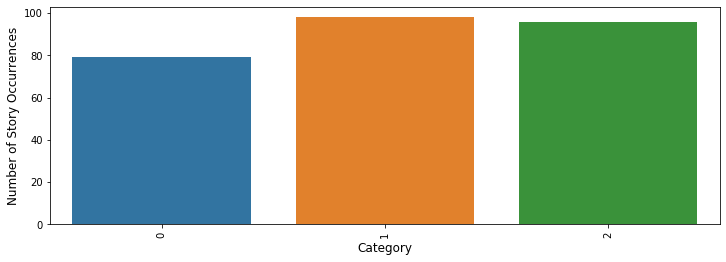

In [82]:
cnt_pro = df['category'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=1)
plt.ylabel('Number of Story Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [83]:
work_stress_counter, bullying_counter, sexual_harassment_counter = 0, 0, 0
for c in df['category']:
    if c==0:
        work_stress_counter+=1
    elif c == 1:
        bullying_counter+=1
    else:
        sexual_harassment_counter+=1
print("Work Stress Total Data Count: ", work_stress_counter)
print("Bullying Total Data Count: ", bullying_counter)
print("Sexual Harassment Total Data Count: ", sexual_harassment_counter)
print("Total Data Count: ", work_stress_counter + bullying_counter + sexual_harassment_counter)

Work Stress Total Data Count:  79
Bullying Total Data Count:  98
Sexual Harassment Total Data Count:  96
Total Data Count:  273


In [84]:
# colors = ("red","green","blue")
# area = np.pi*3

# dt = (df['story'], )
# # Plot
# plt.scatter(df['story'], df['category'], s=area, c=colors, alpha=0.5)
# plt.title('Scatter Plot of Data Occurrences')
# plt.xlabel('Data')
# plt.ylabel('Category')
# plt.show()
df.iloc[[2]]

,story,category
2,"1st year of my undergrad, I was on my way to c...",1


In [85]:
print(df.story[50])
print(df.category[50])

I’ve recently come out of hospital myself after suffering burnout from work. I run a small business with my husband. The combination of weaning off my antidepressants just before Christmas and a quiet start to the new year (not as much work as normal), I ended up crashing & burning and became highly distressed & manic. I presented myself to emergency at my local hospital where I was admitted to the psych ward & my stay lasted 6 days. I was a mess & truly needed this break. It’s been a month since my hospital stay & I am still very much struggling with my catastrophizing thoughts (about losing the business & our house). I have been put back on the antidepressants as well as anti psychotics (for anxiety). They help but I am so tired of feeling up & down all the time. I just want to get better so that I can go back to work & face any work challenges like a “normal” person again.
0


In [86]:
print(df.story[0])
print(df.category[0])

My trainer FaceTimed me multiple times. I ignored his calls because I thought it was strange and that if it was important he'd leave a voicemail or text/email me, but he kept calling (at least five times). Finally, I answered. He was naked and masturbating with the camera pointed directly on him. I hung up immediately. He then proceeded to Facebook message me, begging me to answer the phone, saying that it was "a form of flattering" to have him want to masturbate to my voice/face/gym results. I avoided the gym for a while after that. For a few months, I even avoided walking on the same street as the gym to avoid any contact with the trainer. I finally got the courage to walk in and ask to speak to the manager and the owner. Once the manager heard my story (a woman) she had me talk to the owner. Sadly, the owner basically said to get over it because it happens in all gyms.
2


In [87]:
print(df.story[10])
print(df.category[10])

I was in my 20s in the 1980s and I was referred and scheduled to see an Upper East Side New York Gyn doctor to cauterize a small cyst from my cervix. Upon completion of this procedure, he leaned into me while I was on the table and placed his hands at the tops of my thighs and asked me if there was anything else he could do for me today inches from my face. I was so caught off guard and shocked by his behavior that I never went to a male GYN doctor again. No one would have believed me as he was a prominent doctor.
2


In [88]:
max_len = 0
para = None
for s in df['story']:
    if len(s) > max_len:
        max_len = len(s)
        para = s
print(max_len)
print(para)

4170
I met him on plentyoffish.com and we went on two dates. There was no sexual relationship between us. I was lonely and a little depressed like I usually was after Christmas when I messaged him on Facebook. It was early in the morning, between 3am and 5am. I was sober. I drove to the address he gave me in Sauk Rapids. It was an apartment building. He let me in the security door and I followed him to a 2nd floor apartment. He was stumbling a little. We walked into the apartment and I met his friend. His friend left. I looked around the apartment. There was empty pop and liquor bottles covering the counter, along with red solo cups. I saw an army duffle bag and a large gun. In the living room there was a leather couch, glass coffee table and a big screen. I was standing at the back of the couch when he came up behind me. He put his arms gently around my waist and softly kissed my neck. His fingers slid under my pants and he started to try to pull them down, but these jeans were tight 

In [89]:
min_len = 4170
para = None
for s in df['story']:
    if len(s) < min_len:
        min_len = len(s)
        para = s
print(min_len)
print(para)

114
In college days, gangs of boys beat me up when they found me alone because I told them to simply move from my seat


In [90]:
stops = set(stopwords.words("english"))
df['story'].apply(lambda x: [item for item in x.lower().split() if item not in stops])

0      [trainer, facetimed, multiple, times., ignored...
1      [worked, similar, job, telemarketing., heart, ...
2      [1st, year, undergrad,, way, class,, suddenly,...
3      [got, made, fun, fat, elementary,, middle,, ev...
4      [worked, company, highly, stressful, toxic, en...
                             ...                        
268    [debilitating, migraines, three, years, toxic,...
269    [remember, used, get, bullied., started, 5th, ...
270    [regarding, teachers', vile, comment, students...
271    [school, always, type, say, would, everything,...
272    [eleven, years, ago, sexually, harassed, teena...
Name: story, Length: 273, dtype: object

In [91]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    text = re.sub(r"[^A-Za-z0-9(),!.?\'`]", " ", text )
    text = re.sub(r"\'s", " 's ", text )
    text = re.sub(r"\'ve", " 've ", text )
    text = re.sub(r"n\'t", " 't ", text )
    text = re.sub(r"\'re", " 're ", text )
    text = re.sub(r"\'d", " 'd ", text )
    text = re.sub(r"\'ll", " 'll ", text )
    text = re.sub(r",", " ", text )
    text = re.sub(r"\.", " ", text )
    text = re.sub(r"!", " ", text )
    text = re.sub(r"\(", " ( ", text )
    text = re.sub(r"\)", " ) ", text )
    text = re.sub(r"\?", " ", text )
    text = re.sub(r"\s{2,}", " ", text )
    return text
df['story'] = df['story'].apply(cleanText)
df.head(5)

,story,category
0,my trainer facetimed me multiple times i ignor...,2
1,i worked a similar job in telemarketing my hea...,0
2,1st year of my undergrad i was on my way to cl...,1
3,i got made fun of for being fat in elementary ...,1
4,i worked for a company that was highly stressf...,0


In [92]:
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

### WITH TRAIN_TEST_SPLIT

In [93]:
train, test = train_test_split(df, test_size = .20, random_state = 2)

In [94]:
train_tagged = train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
test_tagged = test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)

In [95]:
train

,story,category
41,one of our rotations as second year family pra...,0
142,my torture began when in 8th grade my parents ...,1
94,all of my work eperience has been in the los a...,0
206,i have been bullied since i was young on my fi...,1
212,hi i'm rahul i was bullied all through school ...,1
...,...,...
75,a girl jumped on me on my friend 's house she ...,2
22,during my sophomore year at wake forest i was ...,2
72,being a police officer is one of the hardest j...,0
15,i loved my work but hated going each day becau...,0


In [96]:
len(train)

218

In [97]:
test

,story,category
66,my team partner who was engaged at the time to...,2
7,i ve had customers follow me around the store ...,2
77,hello first of all i'm sorry if there are a fe...,1
13,i was fresh off of moving to a new town and en...,1
71,i was very young and i don t remember much he ...,2
192,when i was around 10 11do to a little family i...,1
130,i have a weird name i do 't even know why i ha...,1
113,and im 14 years old all my life i been bullied...,1
53,i love my work but hate going each day because...,0
159,i m currently working at starbucks and as a 23...,2


In [98]:
len(test)

55

In [99]:
train_tagged

41     ([one, of, our, rotations, as, second, year, f...
142    ([my, torture, began, when, in, 8th, grade, my...
94     ([all, of, my, work, eperience, has, been, in,...
206    ([have, been, bullied, since, was, young, on, ...
212    ([hi, 'm, rahul, was, bullied, all, through, s...
                             ...                        
75     ([girl, jumped, on, me, on, my, friend, 's, ho...
22     ([during, my, sophomore, year, at, wake, fores...
72     ([being, police, officer, is, one, of, the, ha...
15     ([loved, my, work, but, hated, going, each, da...
168    ([went, back, to, college, last, year, am, nea...
Length: 218, dtype: object

In [100]:
train_tagged.values[2]

TaggedDocument(words=['all', 'of', 'my', 'work', 'eperience', 'has', 'been', 'in', 'the', 'los', 'angeles', 'area', 'so', 'can', 'speak', 'for', 'other', 'tech', 'hubs', 'or', 'other', 'regions', 'of', 'the', 'world', 'but', 'have', 'found', 'that', 'there', 'is', 'almost', 'always', 'very', 'high', 'level', 'of', 'competition', 'in', 'most', 'offices', 'that', 'tends', 'to', 'split', 'teams', 'apart', 'in', 'my', 'earlier', 'days', 'the', 'etra', 'hours', 'didn', 'bother', 'me', 'as', 'much', 'and', 'because', 'of', 'all', 'the', 'youthful', 'energy', 'had', 'but', 'over', 'time', 'you', 'start', 'to', 'value', 'more', 'traditional', 'work', 'day', 'and', 'naturally', 'desire', 'better', 'work', 'life', 'balance', 'either', 'that', 'or', 'one', 'develops', 'hobbies', 'outside', 'of', 'programming', 'or', 'coding', 'lot', 'of', 'offices', 'understand', 'this', 'but', 'will', 'quickly', 'outsource', 'work', 'to', 'people', 'they', 'can', 'more', 'readily', 'eploit', 'so', 'it', 'catch',

In [101]:
test_tagged.values[1]

TaggedDocument(words=['ve', 'had', 'customers', 'follow', 'me', 'around', 'the', 'store', 'and', 'specifically', 'look', 'for', 'me', 'just', 'to', 'talk', 'to', 'me', 'then', 'continue', 'to', 'tell', 'me', 'how', 'pretty', 'am', 'to', 'the', 'point', 'where', 'it', 'uncomfortable', 'have', 'said', 'thank', 'you', 'and', 'let', 'them', 'know', 'it', 'unwanted', 'attention', 'but', 'it', 'makes', 'working', 'uncomfortable', 'because', 'you', 'don', 'know', 'who', 'you', 're', 'going', 'to', 'run', 'into', 'when', 'you', 'clock', 'in'], tags=[2])

### PV-DBOW

In [102]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 218/218 [00:00<00:00, 676801.09it/s]


In [103]:
%%time
for epoch in range(5):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 218/218 [00:00<00:00, 183938.50it/s]

CPU times: user 381 ms, sys: 27.7 ms, total: 409 ms
Wall time: 136 ms


In [104]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [105]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

In [106]:
print(X_train[0])
print(y_train[0])
print(type(X_train))

[-4.85447228e-01 -3.94059479e-01 -2.64865369e-01  4.11180258e-01
 -9.90399122e-02 -1.75829053e-01  2.76545107e-01  1.03623621e-01
 -7.19838589e-02  8.06425810e-02 -1.86848536e-01  1.00333162e-01
 -1.18764512e-01 -1.00550190e-01  2.18460694e-01  2.50619024e-01
 -2.09655583e-01  2.74300754e-01  7.85383210e-02 -2.41625875e-01
 -1.81199878e-01  3.37915659e-01  2.99422711e-01  3.67100477e-01
 -1.69458032e-01  9.72390994e-02 -2.31744032e-02  9.21236202e-02
 -1.08784221e-01 -1.25782475e-01  4.14405158e-03 -2.47831076e-01
 -3.30206215e-01 -4.16595526e-02  1.12694673e-01  2.01748177e-01
  1.60701543e-01 -3.01679343e-01 -2.81889550e-03 -1.07935622e-01
 -1.70317665e-03 -1.80642858e-01  2.60780752e-01  2.77064019e-03
  3.20246071e-02 -1.98847681e-01 -1.29930200e-02 -3.78232971e-02
 -7.65834972e-02  3.02697837e-01  7.69034177e-02 -2.48596326e-01
  3.55698317e-01  2.17540279e-01  5.71957119e-02 -1.90614760e-01
  1.47999033e-01  8.83848220e-02 -1.93331525e-01  2.91994005e-01
  7.44324774e-02 -1.14612

In [107]:
y_train

(0,
 1,
 0,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 0,
 2,
 0,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 0,
 1,
 2,
 2,
 1,
 1,
 1,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 1,
 2,
 2,
 0,
 1,
 0,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 0,
 2,
 0,
 2,
 1,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 2,
 2,
 1,
 1,
 0,
 2,
 0,
 1,
 0,
 1,
 2,
 2,
 1,
 2,
 2,
 0,
 1,
 0,
 1,
 1,
 2,
 2,
 1,
 0,
 2,
 0,
 1,
 2,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 2,
 2,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 2,
 1,
 2,
 1,
 0,
 1,
 2,
 1,
 2,
 1,
 2,
 0,
 1,
 2,
 0,
 0,
 1,
 1,
 2,
 2,
 0,
 1,
 2,
 2,
 1,
 2,
 0,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 1,
 0,
 1,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 2,
 2,
 0,
 0,
 1,
 2,
 2,
 2,
 0,
 1,
 1,
 1,
 2,
 2,
 0,
 0,
 0)

In [108]:
# colors = (0,0,0)
# area = np.pi*3

# # Plot
# plt.scatter(X_train, y_train, s=area, c=colors, alpha=0.5)
# plt.title('Scatter Plot For First Trainig Paragraph Vector Data')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()

In [109]:
# import scikitplot as skplt
# # fig = plt.figure()
# # ax = fig.add_axes([0,0,1,1])
# # ax.axis('equal')
# # # langs = ['C', 'C++', 'Java', 'Python', 'PHP']
# # # students = [23,17,35,29,12]
# # ax.pie(X_train, labels = y_train,autopct='%1.2f%%')
# # plt.show()
# model_dbow.docvecs.similarity('1', '2')

In [110]:
print('Work Stress:')
f1 = 'This is frustrating, working in projects that are done but I have to work more frequently I have to work again and again. Last night, I almost lost my sense due to immense pressure at this work. This morning I could not take my breakfast properly also could not sleep properly the whole night as I had to stay awake till dawn for this work.'
print(f1+"\n")

print('Sexual Harassment:')
f2 = 'I knew this guy for a few days. One day we met and he hit up on be and told me to get physical with him which I found so offensive. I tried to avoid him but he got my number and kept calling me again and again to meet up with me telling that he was sorry for last incident. I told him not to call me but he didn\'t listen to me. He also texted me adult jokes and the words in those jokes are quite inappropriate.'
print(f2+"\n")

print("Sexual Harassment:")
f3 = 'One day while going to the school I suddenly heard a whistle and saw some boys looking at me and their inappropriate gesture shivered me to the core. I also heard them whispering dirty talks behind me. They followed me to the school. After break, while I was returning from school I found those bastards got arrested while they started to tease a girl in front of a police car without noticing that car.'
print(f3)

Work Stress:
This is frustrating, working in projects that are done but I have to work more frequently I have to work again and again. Last night, I almost lost my sense due to immense pressure at this work. This morning I could not take my breakfast properly also could not sleep properly the whole night as I had to stay awake till dawn for this work.

Sexual Harassment:
I knew this guy for a few days. One day we met and he hit up on be and told me to get physical with him which I found so offensive. I tried to avoid him but he got my number and kept calling me again and again to meet up with me telling that he was sorry for last incident. I told him not to call me but he didn't listen to me. He also texted me adult jokes and the words in those jokes are quite inappropriate.

Sexual Harassment:
One day while going to the school I suddenly heard a whistle and saw some boys looking at me and their inappropriate gesture shivered me to the core. I also heard them whispering dirty talks beh

In [111]:
v1 = model_dbow.infer_vector(f3.split())
v2 = model_dbow.infer_vector(f1.split())

similarity = spatial.distance.cosine(v1, v2)
similarity

0.016205549240112305

In [112]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [113]:
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
print('\nTesting Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred),"\n")
print('Testing Classification Report: ')
print(classification_report(y_test, y_pred))

Testing accuracy 0.8727272727272727
Testing F1 score: 0.8759604736348922

Testing Confusion Matrix: 
[[13  0  2]
 [ 0 17  5]
 [ 0  0 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       1.00      0.77      0.87        22
           2       0.72      1.00      0.84        18

    accuracy                           0.87        55
   macro avg       0.91      0.88      0.88        55
weighted avg       0.91      0.87      0.88        55



### PV-DM

In [114]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 218/218 [00:00<00:00, 915273.55it/s]


In [115]:
%%time
for epoch in range(5):
    model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dmm.alpha

100%|██████████| 218/218 [00:00<00:00, 626702.04it/s]

CPU times: user 481 ms, sys: 20.9 ms, total: 502 ms
Wall time: 200 ms


In [116]:
y_train, X_train = vec_for_learning(model_dmm, train_tagged)
y_test, X_test = vec_for_learning(model_dmm, test_tagged)

In [117]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [118]:
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
print('\nTesting Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred),"\n")
print('Testing Classification Report: ')
print(classification_report(y_test, y_pred))

Testing accuracy 0.8909090909090909
Testing F1 score: 0.8936754302607961

Testing Confusion Matrix: 
[[12  0  3]
 [ 0 19  3]
 [ 0  0 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       1.00      0.86      0.93        22
           2       0.75      1.00      0.86        18

    accuracy                           0.89        55
   macro avg       0.92      0.89      0.89        55
weighted avg       0.92      0.89      0.89        55



In [119]:
print('Work Stress:')
f1 = 'This is frustrating, working in projects that are done but I have to work more frequently I have to work again and again. Last night, I almost lost my sense due to immense pressure at this work. This morning I could not take my breakfast properly also could not sleep properly the whole night as I had to stay awake till dawn for this work.'
print(f1+"\n")

print('Sexual Harassment:')
f2 = 'I knew this guy for a few days. One day we met and he hit up on be and told me to get physical with him which I found so offensive. I tried to avoid him but he got my number and kept calling me again and again to meet up with me telling that he was sorry for last incident. I told him not to call me but he didn\'t listen to me. He also texted me adult jokes and the words in those jokes are quite inappropriate.'
print(f2+"\n")

print("Sexual Harassment:")
f3 = 'One day while going to the school I suddenly heard a whistle and saw some boys looking at me and their inappropriate gesture shivered me to the core. I also heard them whispering dirty talks behind me. They followed me to the school. After break, while I was returning from school I found those bastards got arrested while they started to tease a girl in front of a police car without noticing that car.'
print(f3)

Work Stress:
This is frustrating, working in projects that are done but I have to work more frequently I have to work again and again. Last night, I almost lost my sense due to immense pressure at this work. This morning I could not take my breakfast properly also could not sleep properly the whole night as I had to stay awake till dawn for this work.

Sexual Harassment:
I knew this guy for a few days. One day we met and he hit up on be and told me to get physical with him which I found so offensive. I tried to avoid him but he got my number and kept calling me again and again to meet up with me telling that he was sorry for last incident. I told him not to call me but he didn't listen to me. He also texted me adult jokes and the words in those jokes are quite inappropriate.

Sexual Harassment:
One day while going to the school I suddenly heard a whistle and saw some boys looking at me and their inappropriate gesture shivered me to the core. I also heard them whispering dirty talks beh

In [120]:
v1 = model_dmm.infer_vector(f1.split())
v2 = model_dmm.infer_vector(f2.split())

similarity = spatial.distance.cosine(v1, v2)
similarity

0.5559519529342651

### Paired Model

In [121]:
model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [122]:
new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])

In [123]:
def get_vectors(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [124]:
y_train, X_train = get_vectors(new_model, train_tagged)
y_test, X_test = get_vectors(new_model, test_tagged)

In [125]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [126]:
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
print('\nTesting Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred),"\n")
print('Testing Classification Report: ')
print(classification_report(y_test, y_pred))

Testing accuracy 0.8545454545454545
Testing F1 score: 0.858537825810553

Testing Confusion Matrix: 
[[11  0  4]
 [ 0 18  4]
 [ 0  0 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       1.00      0.82      0.90        22
           2       0.69      1.00      0.82        18

    accuracy                           0.85        55
   macro avg       0.90      0.85      0.85        55
weighted avg       0.90      0.85      0.86        55



In [127]:
print('Work Stress:')
f1 = 'This is frustrating, working in projects that are done but I have to work more frequently I have to work again and again. Last night, I almost lost my sense due to immense pressure at this work. This morning I could not take my breakfast properly also could not sleep properly the whole night as I had to stay awake till dawn for this work.'
print(f1+"\n")

print('Sexual Harassment:')
f2 = 'I knew this guy for a few days. One day we met and he hit up on be and told me to get physical with him which I found so offensive. I tried to avoid him but he got my number and kept calling me again and again to meet up with me telling that he was sorry for last incident. I told him not to call me but he didn\'t listen to me. He also texted me adult jokes and the words in those jokes are quite inappropriate.'
print(f2+"\n")

print("Sexual Harassment:")
f3 = 'One day while going to the school I suddenly heard a whistle and saw some boys looking at me and their inappropriate gesture shivered me to the core. I also heard them whispering dirty talks behind me. They followed me to the school. After break, while I was returning from school I found those bastards got arrested while they started to tease a girl in front of a police car without noticing that car.'
print(f3)

Work Stress:
This is frustrating, working in projects that are done but I have to work more frequently I have to work again and again. Last night, I almost lost my sense due to immense pressure at this work. This morning I could not take my breakfast properly also could not sleep properly the whole night as I had to stay awake till dawn for this work.

Sexual Harassment:
I knew this guy for a few days. One day we met and he hit up on be and told me to get physical with him which I found so offensive. I tried to avoid him but he got my number and kept calling me again and again to meet up with me telling that he was sorry for last incident. I told him not to call me but he didn't listen to me. He also texted me adult jokes and the words in those jokes are quite inappropriate.

Sexual Harassment:
One day while going to the school I suddenly heard a whistle and saw some boys looking at me and their inappropriate gesture shivered me to the core. I also heard them whispering dirty talks beh

In [128]:
v1 = new_model.infer_vector(f2.split())
v2 = new_model.infer_vector(f3.split())

similarity = spatial.distance.cosine(v1, v2)
similarity

0.21826773881912231

In [129]:
print('Work Stress:')
f1 = 'This is frustrating, working in projects that are done but I have to work more frequently I have to work again and again. Last night, I almost lost my sense due to immense pressure at this work. This morning I could not take my breakfast properly also could not sleep properly the whole night as I had to stay awake till dawn for this work.'
print(f1+"\n")

print('Sexual Harassment:')
f2 = 'I knew this guy for a few days. One day we met and he hit up on be and told me to get physical with him which I found so offensive. I tried to avoid him but he got my number and kept calling me again and again to meet up with me telling that he was sorry for last incident. I told him not to call me but he didn\'t listen to me. He also texted me adult jokes and the words in those jokes are quite inappropriate.'
print(f2+"\n")

print("Sexual Harassment:")
f3 = 'One day while going to the school I suddenly heard a whistle and saw some boys looking at me and their inappropriate gesture shivered me to the core. I also heard them whispering dirty talks behind me. They followed me to the school. After break, while I was returning from school I found those bastards got arrested while they started to tease a girl in front of a police car without noticing that car.'
print(f3+"\n")

print("Bullying:")
f4 = 'When I was child, I was cold \'dwarf\' as I was quite shorter than others. I did not pay any attention to those but it hurt when my elder brother and sister irritated me by saying shorty also. The bullying continued till my 8th grade and then I started to grow quite a lot and now I am one of the tallest member in my family but I will forever remember those irritating days.'
print(f4+"\n")

print("Sexual Harassment:")
f5 = "I don't let those who have abused me have control over me anymore. I lost control of my life just about 7 years ago. I went through things no little girl should at 13... 14... 15... 16... 17... Everytime I'd face one thing another terrible thing would happen. I wanted to stop fighting with everything I had; But I didn't. I kept sleeping on it and pushing through everything. Now im here... Engaged, have my own home with my fiance, and graduated with my associates degree in baking and pastry. I no longer fear to leave the house or go to work. I have done everything I said i'd never be able to. Even though it still gets overwhelming and scary I did it. My demons don't own me anymore."
print(f5+"\n")

print("Work Stress: ")
f6 = "During the freshman year of my college, I could not catch the lessons that were taught in the class whatsoever. I could not prpare my homeworks properly. I thought it is my own fault but eventually I realized the journey, toll of huge homeworks, and dealing with bronchitis which I have been suffering from since my childhood eventually giving me stress and the pressure was going on and on. I could not pay attention to anyone. Later on I took a year break and returned to college which eventually helped me achieving good grade in HSC."
print(f6 + "\n")

print("Work Stress: ")
f7 = "The work load at my office is increasing day by day. It is causing me problem. Almost everyday I have to face nausea and I get panick attack quite often. My co-workers are dealing with stress quite good which also gives me pressure that I am not suitable to work here. The ongoing pressure on me will eventually break me apart I am sure but I cannot quit the job as I am not that financially okay."
print(f7+"\n")

print("Bullying: ")
f8 = "I work in a ladies parlour. When I was new to my office I had a toxic relationship with one of my co-workers. She always tried to find fault in my works and usually critisized me in front of other co-workers. This type of bullying continued untill one day she got caught stealing customer's money without their consent. After she left, everyone kind of got releaved as they also could not keep up with her."
print(f8+"\n")

print("Bullying: ")
f9 = "My friends usually made fun of me for my stammer. When they start make fun of me my problem increased which eventually led me to get stressed and I end up crying and running away from them. This mental torture continued till my high school until one teacher stood beside me and helped me to overcome my problem. I will forever remember those days in my life."
print(f9+"\n")

Work Stress:
This is frustrating, working in projects that are done but I have to work more frequently I have to work again and again. Last night, I almost lost my sense due to immense pressure at this work. This morning I could not take my breakfast properly also could not sleep properly the whole night as I had to stay awake till dawn for this work.

Sexual Harassment:
I knew this guy for a few days. One day we met and he hit up on be and told me to get physical with him which I found so offensive. I tried to avoid him but he got my number and kept calling me again and again to meet up with me telling that he was sorry for last incident. I told him not to call me but he didn't listen to me. He also texted me adult jokes and the words in those jokes are quite inappropriate.

Sexual Harassment:
One day while going to the school I suddenly heard a whistle and saw some boys looking at me and their inappropriate gesture shivered me to the core. I also heard them whispering dirty talks beh

In [130]:
extra_test = [f1, f2, f3, f4, f5, f6, f7, f8, f9]
extra_category = [0, 2, 2, 1, 2, 0, 0, 1, 1]

In [131]:
extra_test = list(zip(extra_test,extra_category))
extra_test = pd.DataFrame(extra_test, columns=['story', 'category'])

In [132]:
print(extra_test.story, " ", extra_test.category)

0    This is frustrating, working in projects that ...
1    I knew this guy for a few days. One day we met...
2    One day while going to the school I suddenly h...
3    When I was child, I was cold 'dwarf' as I was ...
4    I don't let those who have abused me have cont...
5    During the freshman year of my college, I coul...
6    The work load at my office is increasing day b...
7    I work in a ladies parlour. When I was new to ...
8    My friends usually made fun of me for my stamm...
Name: story, dtype: object   0    0
1    2
2    2
3    1
4    2
5    0
6    0
7    1
8    1
Name: category, dtype: int64


In [133]:
extra_test['story'].apply(lambda x: [item for item in x.lower().split() if item not in stops])

0    [frustrating,, working, projects, done, work, ...
1    [knew, guy, days., one, day, met, hit, told, g...
2    [one, day, going, school, suddenly, heard, whi...
3    [child,, cold, 'dwarf', quite, shorter, others...
4    [let, abused, control, anymore., lost, control...
5    [freshman, year, college,, could, catch, lesso...
6    [work, load, office, increasing, day, day., ca...
7    [work, ladies, parlour., new, office, toxic, r...
8    [friends, usually, made, fun, stammer., start,...
Name: story, dtype: object

In [134]:
extra_test['story'] = extra_test['story'].apply(cleanText)
extra_test.head(9)

,story,category
0,this is frustrating working in projects that a...,0
1,i knew this guy for a few days one day we met ...,2
2,one day while going to the school i suddenly h...,2
3,when i was child i was cold 'd warf' as i was ...,1
4,i do 't let those who have abused me have cont...,2
5,during the freshman year of my college i could...,0
6,the work load at my office is increasing day b...,0
7,i work in a ladies parlour when i was new to m...,1
8,my friends usually made fun of me for my stamm...,1


In [135]:
extra_tagged = extra_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)

### WITH K-FOLD

In [136]:
X = df['story']
print("Length: ", len(X))
print("Type: ", type(X))
print("First Ten Values:\n", X[:10])
print(X[0])

Length:  273
Type:  <class 'pandas.core.series.Series'>
First Ten Values:
 0    my trainer facetimed me multiple times i ignor...
1    i worked a similar job in telemarketing my hea...
2    1st year of my undergrad i was on my way to cl...
3    i got made fun of for being fat in elementary ...
4    i worked for a company that was highly stressf...
5    at my old school kids would hit me and call me...
6    i became overwhelmed with work and life i beca...
7    i ve had customers follow me around the store ...
8    the first time was the day after my 20th birth...
9    i 've been bullied since pre k i always wore p...
Name: story, dtype: object
my trainer facetimed me multiple times i ignored his calls because i thought it was strange and that if it was important he 'd leave a voicemail or tet email me but he kept calling ( at least five times ) finally i answered he was naked and masturbating with the camera pointed directly on him i hung up immediately he then proceeded to facebook me

In [137]:
y = df['category']
print("Length: ", len(y))
print("Type: ", type(y))
print("First Ten Values: ", y[:10])

Length:  273
Type:  <class 'pandas.core.series.Series'>
First Ten Values:  0    2
1    0
2    1
3    1
4    0
5    1
6    0
7    2
8    2
9    1
Name: category, dtype: int64


In [138]:
ten_fold = KFold(n_splits=5, shuffle = True, random_state=42)
ten_fold

KFold(n_splits=5, random_state=42, shuffle=True)

In [139]:
print("Total Fold: ", ten_fold.get_n_splits(X))
fold_no = 1
for train_index, test_index in ten_fold.split(X):
#     print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("X_train: ", X_train.shape, "X_test: ", X_test.shape)

Total Fold:  5
X_train:  (218,) X_test:  (55,)
X_train:  (218,) X_test:  (55,)
X_train:  (218,) X_test:  (55,)
X_train:  (219,) X_test:  (54,)
X_train:  (219,) X_test:  (54,)


In [140]:
total_fold = ten_fold.get_n_splits(X)
print(total_fold)

5


### K-FOLD PV-DBOW

In [141]:
dt_dbow_entropy = None
dt_dm_entropy = None
dt_paired_entropy = None
model_dbow = None
model_dmm = None
new_model = None

print("Total Fold: ", total_fold)
fold_no = 1
for train_index, test_index in ten_fold.split(X):
    print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("No. of Training Dataset in Fold: ", fold_no, "", len(X_train))
    print("No. of Testing Dataset in Fold: ", fold_no, "", len(X_test))
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
    model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dbow.alpha -= 0.002
        model_dbow.min_alpha = model_dbow.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dbow, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dbow, test_tagged)
    
    logreg = LogisticRegression(n_jobs=1, C=1e5)
    logreg.fit(X_trained, y_trained)
    y_pred = logreg.predict(X_tested)
    
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    
    print("\n\n")
    fold_no+=1

Total Fold:  5
Train Fold No.:  [  0   1   2   3   4   5   7   8  10  11  12  13  14  16  17  18  20  21
  23  26  27  28  29  31  32  33  34  35  36  37  38  39  40  41  43  44
  47  48  49  50  51  52  53  54  55  56  57  58  59  61  62  63  64  65
  66  69  70  71  72  73  74  75  76  78  80  81  83  84  85  86  87  88
  89  91  92  94  95  96  97  98  99 100 101 102 103 105 106 107 108 110
 111 112 114 116 118 121 122 123 124 125 127 128 129 130 131 133 134 135
 136 137 138 140 141 142 143 144 145 147 149 150 151 152 153 156 157 158
 159 160 161 162 163 164 165 166 168 169 170 171 172 173 174 175 177 178
 179 180 181 182 183 184 186 187 188 189 190 191 192 193 194 195 197 198
 199 200 201 202 203 204 205 206 207 209 210 214 215 216 217 218 219 220
 221 222 224 225 228 230 231 233 235 236 237 238 239 240 241 242 243 244
 245 246 247 250 251 252 254 255 257 259 260 261 262 263 266 267 268 269
 270 272]  Test Fold No.:  [  6   9  15  19  22  24  25  30  42  45  46  60  67  68  77  79 

100%|██████████| 218/218 [00:00<00:00, 1348611.02it/s]

Fold No.:  1
Testing accuracy 0.9090909090909091
Testing F1 score: 0.9092713737875029

Testing Confusion Matrix: 
[[14  0  1]
 [ 1 18  1]
 [ 1  1 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.95      0.90      0.92        20
           2       0.90      0.90      0.90        20

    accuracy                           0.91        55
   macro avg       0.91      0.91      0.91        55
weighted avg       0.91      0.91      0.91        55




Train Fold No.:  [  0   1   3   4   5   6   7   8   9  11  12  13  14  15  17  19  20  21
  22  23  24  25  26  27  28  30  31  32  34  35  36  39  40  41  42  43
  44  45  46  47  48  49  50  51  52  53  54  56  57  58  59  60  61  62
  63  64  65  67  68  70  71  72  77  79  80  81  82  83  85  87  88  89
  90  91  93  94  95  98  99 100 102 103 104 105 106 107 109 110 113 114
 115 116 117 119 120 121 122 123 124 126 128 129 


100%|██████████| 218/218 [00:00<00:00, 697983.41it/s]

Fold No.:  2
Testing accuracy 0.8909090909090909
Testing F1 score: 0.8909787530477187

Testing Confusion Matrix: 
[[13  0  2]
 [ 1 16  0]
 [ 0  3 20]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.84      0.94      0.89        17
           2       0.91      0.87      0.89        23

    accuracy                           0.89        55
   macro avg       0.89      0.89      0.89        55
weighted avg       0.89      0.89      0.89        55




Train Fold No.:  [  1   2   3   6   7   8   9  10  13  14  15  16  17  18  19  20  21  22
  23  24  25  29  30  33  34  37  38  39  40  42  43  44  45  46  47  48
  49  50  52  53  54  55  57  58  59  60  62  63  64  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  86  87  88  89
  90  91  92  93  94  96  97  99 101 102 103 104 105 106 107 108 109 110
 111 112 113 115 117 118 119 120 121 123 125 126 


100%|██████████| 219/219 [00:00<00:00, 1037912.52it/s]

Fold No.:  3
Testing accuracy 0.9272727272727272
Testing F1 score: 0.9282251082251082

Testing Confusion Matrix: 
[[13  0  1]
 [ 0 20  2]
 [ 1  0 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       1.00      0.91      0.95        22
           2       0.86      0.95      0.90        19

    accuracy                           0.93        55
   macro avg       0.93      0.93      0.93        55
weighted avg       0.93      0.93      0.93        55




Train Fold No.:  [  0   2   4   5   6   8   9  10  11  12  13  14  15  16  17  18  19  20
  21  22  24  25  26  27  28  29  30  31  32  33  35  36  37  38  41  42
  45  46  48  50  51  52  54  55  56  57  58  59  60  61  63  65  66  67
  68  69  71  72  73  74  75  76  77  78  79  82  84  85  86  87  88  89
  90  92  93  95  96  97  98  99 100 101 102 104 106 107 108 109 111 112
 113 114 115 116 117 118 119 120 121 122 124 125 


100%|██████████| 219/219 [00:00<00:00, 1319759.45it/s]

Fold No.:  4
Testing accuracy 0.8703703703703703
Testing F1 score: 0.8697204484177665

Testing Confusion Matrix: 
[[12  3  0]
 [ 1 24  1]
 [ 1  1 11]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.86      0.92      0.89        26
           2       0.92      0.85      0.88        13

    accuracy                           0.87        54
   macro avg       0.88      0.86      0.87        54
weighted avg       0.87      0.87      0.87        54




Train Fold No.:  [  0   1   2   3   4   5   6   7   9  10  11  12  15  16  18  19  22  23
  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  47  49  51  53  55  56  60  61  62  64  65  66  67
  68  69  70  73  74  75  76  77  78  79  80  81  82  83  84  85  86  90
  91  92  93  94  95  96  97  98 100 101 103 104 105 108 109 110 111 112
 113 114 115 116 117 118 119 120 122 123 124 125 


100%|██████████| 219/219 [00:00<00:00, 1362837.65it/s]


Fold No.:  5
Testing accuracy 0.8148148148148148
Testing F1 score: 0.8141246022260586

Testing Confusion Matrix: 
[[15  3  2]
 [ 0 12  1]
 [ 3  1 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.75      0.92      0.83        13
           2       0.85      0.81      0.83        21

    accuracy                           0.81        54
   macro avg       0.81      0.83      0.82        54
weighted avg       0.82      0.81      0.81        54






### K-FOLD PV-DM 

In [142]:
fold_no = 1
print("Total Fold: ", total_fold)
for train_index, test_index in ten_fold.split(X):
#     print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("No. of Training Dataset in Fold ", fold_no, ": ", len(X_train))
    print("No. of Testing Dataset in Fold ", fold_no, ": ", len(X_test))
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
    model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dmm.alpha -= 0.002
        model_dmm.min_alpha = model_dmm.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dmm, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dmm, test_tagged)
    
    logreg = LogisticRegression(n_jobs=1, C=1e5)
    logreg.fit(X_trained, y_trained)
    y_pred = logreg.predict(X_tested)
    
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    print("\n\n")
    fold_no+=1

Total Fold:  5
No. of Training Dataset in Fold  1 :  218
No. of Testing Dataset in Fold  1 :  55


100%|██████████| 218/218 [00:00<00:00, 719967.14it/s]

Fold No.:  1
Testing accuracy 0.8363636363636363
Testing F1 score: 0.8286868686868688

Testing Confusion Matrix: 
[[ 9  3  3]
 [ 0 20  0]
 [ 1  2 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.80      1.00      0.89        20
           2       0.85      0.85      0.85        20

    accuracy                           0.84        55
   macro avg       0.85      0.82      0.82        55
weighted avg       0.85      0.84      0.83        55




No. of Training Dataset in Fold  2 :  218
No. of Testing Dataset in Fold  2 :  55



100%|██████████| 218/218 [00:00<00:00, 532222.51it/s]

Fold No.:  2
Testing accuracy 0.9090909090909091
Testing F1 score: 0.908843537414966

Testing Confusion Matrix: 
[[12  0  3]
 [ 0 16  1]
 [ 0  1 22]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.94      0.94      0.94        17
           2       0.85      0.96      0.90        23

    accuracy                           0.91        55
   macro avg       0.93      0.90      0.91        55
weighted avg       0.92      0.91      0.91        55




No. of Training Dataset in Fold  3 :  218
No. of Testing Dataset in Fold  3 :  55



100%|██████████| 219/219 [00:00<00:00, 1329309.08it/s]

Fold No.:  3
Testing accuracy 0.9272727272727272
Testing F1 score: 0.9276923076923077

Testing Confusion Matrix: 
[[12  0  2]
 [ 0 21  1]
 [ 0  1 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.95      0.95      0.95        22
           2       0.86      0.95      0.90        19

    accuracy                           0.93        55
   macro avg       0.94      0.92      0.93        55
weighted avg       0.93      0.93      0.93        55




No. of Training Dataset in Fold  4 :  219
No. of Testing Dataset in Fold  4 :  54



100%|██████████| 219/219 [00:00<00:00, 376764.80it/s]

Fold No.:  4
Testing accuracy 0.8703703703703703
Testing F1 score: 0.8694252873563217

Testing Confusion Matrix: 
[[12  2  1]
 [ 2 22  2]
 [ 0  0 13]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.92      0.85      0.88        26
           2       0.81      1.00      0.90        13

    accuracy                           0.87        54
   macro avg       0.86      0.88      0.87        54
weighted avg       0.88      0.87      0.87        54




No. of Training Dataset in Fold  5 :  219
No. of Testing Dataset in Fold  5 :  54



100%|██████████| 219/219 [00:00<00:00, 1354797.31it/s]


Fold No.:  5
Testing accuracy 0.8148148148148148
Testing F1 score: 0.8133876650321251

Testing Confusion Matrix: 
[[17  2  1]
 [ 0 12  1]
 [ 4  2 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.75      0.92      0.83        13
           2       0.88      0.71      0.79        21

    accuracy                           0.81        54
   macro avg       0.81      0.83      0.82        54
weighted avg       0.82      0.81      0.81        54






### PAIRED MODEL

In [143]:
fold_no = 1
print("Total Fold No.: {}\n\n" .format(total_fold))
for train_index, test_index in ten_fold.split(X):
#     print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("No. of Training Dataset in Fold ", fold_no, ": ", len(X_train))
    print("No. of Testing Dataset in Fold ", fold_no, ": ", len(X_test))
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    #PV_DBOW
    model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
    model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dbow.alpha -= 0.002
        model_dbow.min_alpha = model_dbow.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dbow, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dbow, test_tagged)
    
    logreg_dbow = LogisticRegression(n_jobs=1, C=1e5)
    logreg_dbow.fit(X_trained, y_trained)
    y_pred = logreg_dbow.predict(X_tested)
    
    print("FOR PV_DBOW: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    
    #PV_DM
    model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
    model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dmm.alpha -= 0.002
        model_dmm.min_alpha = model_dmm.alpha
    
    y_trained, X_trained = vec_for_learning(model_dmm, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dmm, test_tagged)
    
    logreg_dm = LogisticRegression(n_jobs=1, C=1e5)
    logreg_dm.fit(X_trained, y_trained)
    y_pred = logreg_dm.predict(X_tested)
    
    print("FOR PV_DM: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    #FOR PAIRED_MODEL
    model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    
    new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])
    
    y_train, X_train = vec_for_learning(new_model, train_tagged)
    y_test, X_test = vec_for_learning(new_model, test_tagged)
    
    logreg_paired = LogisticRegression(n_jobs=1, C=1e5)
    logreg_paired.fit(X_train, y_train)
    y_pred = logreg_paired.predict(X_test)
    
    print("FOR Paired Model: ")
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    fold_no+=1

Total Fold No.: 5


No. of Training Dataset in Fold  1 :  218
No. of Testing Dataset in Fold  1 :  55


100%|██████████| 218/218 [00:00<00:00, 774223.77it/s]

FOR PV_DBOW: 
Fold No.:  1
Testing accuracy 0.9272727272727272
Testing F1 score: 0.9274531919693211

Testing Confusion Matrix: 
[[14  0  1]
 [ 1 19  0]
 [ 1  1 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.95      0.95      0.95        20
           2       0.95      0.90      0.92        20

    accuracy                           0.93        55
   macro avg       0.92      0.93      0.93        55
weighted avg       0.93      0.93      0.93        55







100%|██████████| 218/218 [00:00<00:00, 1155952.30it/s]


FOR PV_DM: 
Fold No.:  1
Testing accuracy 0.8
Testing F1 score: 0.7848288075560803

Testing Confusion Matrix: 
[[ 7  4  4]
 [ 1 19  0]
 [ 1  1 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.47      0.58        15
           1       0.79      0.95      0.86        20
           2       0.82      0.90      0.86        20

    accuracy                           0.80        55
   macro avg       0.80      0.77      0.77        55
weighted avg       0.80      0.80      0.78        55






100%|██████████| 218/218 [00:00<00:00, 1470029.38it/s]

FOR Paired Model: 
Testing accuracy 0.8363636363636363
Testing F1 score: 0.8357417776022428

Testing Confusion Matrix: 
[[11  1  3]
 [ 1 17  2]
 [ 1  1 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.89      0.85      0.87        20
           2       0.78      0.90      0.84        20

    accuracy                           0.84        55
   macro avg       0.84      0.83      0.83        55
weighted avg       0.84      0.84      0.84        55

No. of Training Dataset in Fold  2 :  218
No. of Testing Dataset in Fold  2 :  55



100%|██████████| 218/218 [00:00<00:00, 771610.36it/s]

FOR PV_DBOW: 
Fold No.:  2
Testing accuracy 0.8545454545454545
Testing F1 score: 0.8546007184305056

Testing Confusion Matrix: 
[[12  0  3]
 [ 1 15  1]
 [ 0  3 20]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.83      0.88      0.86        17
           2       0.83      0.87      0.85        23

    accuracy                           0.85        55
   macro avg       0.86      0.85      0.86        55
weighted avg       0.86      0.85      0.85        55







100%|██████████| 218/218 [00:00<00:00, 799264.22it/s]


FOR PV_DM: 
Fold No.:  2
Testing accuracy 0.8545454545454545
Testing F1 score: 0.8529004862132942

Testing Confusion Matrix: 
[[13  0  2]
 [ 3 12  2]
 [ 1  0 22]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       1.00      0.71      0.83        17
           2       0.85      0.96      0.90        23

    accuracy                           0.85        55
   macro avg       0.87      0.84      0.85        55
weighted avg       0.87      0.85      0.85        55






100%|██████████| 218/218 [00:00<00:00, 830479.81it/s]

FOR Paired Model: 
Testing accuracy 0.8545454545454545
Testing F1 score: 0.8529004862132942

Testing Confusion Matrix: 
[[13  0  2]
 [ 3 12  2]
 [ 1  0 22]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       1.00      0.71      0.83        17
           2       0.85      0.96      0.90        23

    accuracy                           0.85        55
   macro avg       0.87      0.84      0.85        55
weighted avg       0.87      0.85      0.85        55

No. of Training Dataset in Fold  3 :  218
No. of Testing Dataset in Fold  3 :  55



100%|██████████| 218/218 [00:00<00:00, 753799.07it/s]

FOR PV_DBOW: 
Fold No.:  3
Testing accuracy 0.8909090909090909
Testing F1 score: 0.8919920131548038

Testing Confusion Matrix: 
[[12  0  2]
 [ 0 20  2]
 [ 1  1 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.95      0.91      0.93        22
           2       0.81      0.89      0.85        19

    accuracy                           0.89        55
   macro avg       0.89      0.89      0.89        55
weighted avg       0.90      0.89      0.89        55







100%|██████████| 218/218 [00:00<00:00, 865869.58it/s]


FOR PV_DM: 
Fold No.:  3
Testing accuracy 0.8909090909090909
Testing F1 score: 0.8896929157798723

Testing Confusion Matrix: 
[[11  2  1]
 [ 0 21  1]
 [ 1  1 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.88      0.95      0.91        22
           2       0.89      0.89      0.89        19

    accuracy                           0.89        55
   macro avg       0.90      0.88      0.88        55
weighted avg       0.89      0.89      0.89        55






100%|██████████| 219/219 [00:00<00:00, 502765.50it/s]

FOR Paired Model: 
Testing accuracy 0.9272727272727272
Testing F1 score: 0.9271416871416871

Testing Confusion Matrix: 
[[13  1  0]
 [ 0 21  1]
 [ 1  1 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.91      0.95      0.93        22
           2       0.94      0.89      0.92        19

    accuracy                           0.93        55
   macro avg       0.93      0.93      0.93        55
weighted avg       0.93      0.93      0.93        55

No. of Training Dataset in Fold  4 :  219
No. of Testing Dataset in Fold  4 :  54



100%|██████████| 219/219 [00:00<00:00, 820869.15it/s]

FOR PV_DBOW: 
Fold No.:  4
Testing accuracy 0.9074074074074074
Testing F1 score: 0.9075284434761559

Testing Confusion Matrix: 
[[14  1  0]
 [ 1 23  2]
 [ 0  1 12]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.92      0.88      0.90        26
           2       0.86      0.92      0.89        13

    accuracy                           0.91        54
   macro avg       0.90      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54







100%|██████████| 219/219 [00:00<00:00, 1114748.27it/s]


FOR PV_DM: 
Fold No.:  4
Testing accuracy 0.8703703703703703
Testing F1 score: 0.8667616334282999

Testing Confusion Matrix: 
[[10  2  3]
 [ 1 24  1]
 [ 0  0 13]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.92      0.92      0.92        26
           2       0.76      1.00      0.87        13

    accuracy                           0.87        54
   macro avg       0.87      0.86      0.85        54
weighted avg       0.88      0.87      0.87        54






100%|██████████| 219/219 [00:00<00:00, 1197591.36it/s]

FOR Paired Model: 
Testing accuracy 0.9074074074074074
Testing F1 score: 0.9074783595856394

Testing Confusion Matrix: 
[[13  1  1]
 [ 1 24  1]
 [ 0  1 12]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.92      0.92      0.92        26
           2       0.86      0.92      0.89        13

    accuracy                           0.91        54
   macro avg       0.90      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54

No. of Training Dataset in Fold  5 :  219
No. of Testing Dataset in Fold  5 :  54



100%|██████████| 219/219 [00:00<00:00, 1479150.69it/s]

FOR PV_DBOW: 
Fold No.:  5
Testing accuracy 0.8703703703703703
Testing F1 score: 0.872120706028752

Testing Confusion Matrix: 
[[17  3  0]
 [ 0 12  1]
 [ 2  1 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.75      0.92      0.83        13
           2       0.95      0.86      0.90        21

    accuracy                           0.87        54
   macro avg       0.86      0.88      0.87        54
weighted avg       0.88      0.87      0.87        54







100%|██████████| 219/219 [00:00<00:00, 886633.76it/s]


FOR PV_DM: 
Fold No.:  5
Testing accuracy 0.8703703703703703
Testing F1 score: 0.8701815636774987

Testing Confusion Matrix: 
[[18  2  0]
 [ 0 13  0]
 [ 3  2 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.76      1.00      0.87        13
           2       1.00      0.76      0.86        21

    accuracy                           0.87        54
   macro avg       0.87      0.89      0.87        54
weighted avg       0.89      0.87      0.87        54




FOR Paired Model: 
Testing accuracy 0.8518518518518519
Testing F1 score: 0.8530627401595144

Testing Confusion Matrix: 
[[17  3  0]
 [ 0 13  0]
 [ 3  2 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.72      1.00      0.84        13
           2       1.00      0.76      0.86        21

    accura

### Decision Tree Using Entropy

In [144]:
fold_no = 1
print("Total Fold No.: {}\n\n" .format(total_fold))
for train_index, test_index in ten_fold.split(X):
#     print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("No. of Training Dataset in Fold ", fold_no, ": ", len(X_train))
    print("No. of Testing Dataset in Fold ", fold_no, ": ", len(X_test))
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    #PV_DBOW using DT with Entropy
    model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
    model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dbow.alpha -= 0.002
        model_dbow.min_alpha = model_dbow.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dbow, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dbow, test_tagged)
    
    dt_dbow_entropy = DecisionTreeClassifier(criterion = "entropy", 
                                             random_state = 10, 
                                             max_depth = 3, 
                                             min_samples_leaf = 5)
    dt_dbow_entropy.fit(X_trained, y_trained)
    y_pred = dt_dbow_entropy.predict(X_tested)
    
    print("FOR PV_DBOW Using Decision Tree with Entropy: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    
    #PV_DM
    model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
    model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dmm.alpha -= 0.002
        model_dmm.min_alpha = model_dmm.alpha
    
    y_trained, X_trained = vec_for_learning(model_dmm, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dmm, test_tagged)
    
    dt_dbow_entropy = DecisionTreeClassifier(criterion = "entropy", 
                                             random_state = 10, 
                                             max_depth = 3, 
                                             min_samples_leaf = 5)
    dt_dbow_entropy.fit(X_trained, y_trained)
    y_pred = dt_dbow_entropy.predict(X_tested)
    
    print("FOR PV_DM Using Decision Tree with Entropy:  ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    #FOR PAIRED_MODEL
    model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    
    new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])
    
    y_train, X_train = vec_for_learning(new_model, train_tagged)
    y_test, X_test = vec_for_learning(new_model, test_tagged)
    
    dt_dbow_entropy = DecisionTreeClassifier(criterion = "entropy", 
                                             random_state = 10, 
                                             max_depth = 3, 
                                             min_samples_leaf = 5)
    dt_dbow_entropy.fit(X_trained, y_trained)
    y_pred = dt_dbow_entropy.predict(X_tested)
    
    print("FOR Paired Model Using Decision Tree with Entropy: ")
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    fold_no+=1

Total Fold No.: 5


No. of Training Dataset in Fold  1 :  218
No. of Testing Dataset in Fold  1 :  55


100%|██████████| 218/218 [00:00<00:00, 715460.31it/s]

FOR PV_DBOW Using Decision Tree with Entropy: 
Fold No.:  1
Testing accuracy 0.8909090909090909
Testing F1 score: 0.89004329004329

Testing Confusion Matrix: 
[[12  2  1]
 [ 0 19  1]
 [ 1  1 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.86      0.95      0.90        20
           2       0.90      0.90      0.90        20

    accuracy                           0.89        55
   macro avg       0.90      0.88      0.89        55
weighted avg       0.89      0.89      0.89        55







100%|██████████| 218/218 [00:00<00:00, 828973.95it/s]


FOR PV_DM Using Decision Tree with Entropy:  
Fold No.:  1
Testing accuracy 0.9090909090909091
Testing F1 score: 0.9083139083139082

Testing Confusion Matrix: 
[[11  0  4]
 [ 0 19  1]
 [ 0  0 20]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       1.00      0.95      0.97        20
           2       0.80      1.00      0.89        20

    accuracy                           0.91        55
   macro avg       0.93      0.89      0.90        55
weighted avg       0.93      0.91      0.91        55






100%|██████████| 218/218 [00:00<00:00, 1101636.47it/s]

FOR Paired Model Using Decision Tree with Entropy: 
Testing accuracy 0.9090909090909091
Testing F1 score: 0.9083139083139082

Testing Confusion Matrix: 
[[11  0  4]
 [ 0 19  1]
 [ 0  0 20]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       1.00      0.95      0.97        20
           2       0.80      1.00      0.89        20

    accuracy                           0.91        55
   macro avg       0.93      0.89      0.90        55
weighted avg       0.93      0.91      0.91        55

No. of Training Dataset in Fold  2 :  218
No. of Testing Dataset in Fold  2 :  55



100%|██████████| 218/218 [00:00<00:00, 722812.86it/s]

FOR PV_DBOW Using Decision Tree with Entropy: 
Fold No.:  2
Testing accuracy 0.8909090909090909
Testing F1 score: 0.8907787552948843

Testing Confusion Matrix: 
[[14  0  1]
 [ 1 15  1]
 [ 1  2 20]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.88      0.88      0.88        17
           2       0.91      0.87      0.89        23

    accuracy                           0.89        55
   macro avg       0.89      0.90      0.89        55
weighted avg       0.89      0.89      0.89        55







100%|██████████| 218/218 [00:00<00:00, 1325156.92it/s]


FOR PV_DM Using Decision Tree with Entropy:  
Fold No.:  2
Testing accuracy 0.8909090909090909
Testing F1 score: 0.8897006154059447

Testing Confusion Matrix: 
[[13  0  2]
 [ 0 17  0]
 [ 1  3 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.85      1.00      0.92        17
           2       0.90      0.83      0.86        23

    accuracy                           0.89        55
   macro avg       0.89      0.90      0.89        55
weighted avg       0.89      0.89      0.89        55






100%|██████████| 218/218 [00:00<00:00, 695858.65it/s]

FOR Paired Model Using Decision Tree with Entropy: 
Testing accuracy 0.8909090909090909
Testing F1 score: 0.8897006154059447

Testing Confusion Matrix: 
[[13  0  2]
 [ 0 17  0]
 [ 1  3 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.85      1.00      0.92        17
           2       0.90      0.83      0.86        23

    accuracy                           0.89        55
   macro avg       0.89      0.90      0.89        55
weighted avg       0.89      0.89      0.89        55

No. of Training Dataset in Fold  3 :  218
No. of Testing Dataset in Fold  3 :  55



100%|██████████| 218/218 [00:00<00:00, 994949.15it/s]

FOR PV_DBOW Using Decision Tree with Entropy: 
Fold No.:  3
Testing accuracy 0.8909090909090909
Testing F1 score: 0.8927705627705628

Testing Confusion Matrix: 
[[12  0  2]
 [ 0 20  2]
 [ 2  0 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       1.00      0.91      0.95        22
           2       0.81      0.89      0.85        19

    accuracy                           0.89        55
   macro avg       0.89      0.89      0.89        55
weighted avg       0.90      0.89      0.89        55







100%|██████████| 218/218 [00:00<00:00, 1560338.35it/s]


FOR PV_DM Using Decision Tree with Entropy:  
Fold No.:  3
Testing accuracy 0.9272727272727272
Testing F1 score: 0.9268686868686868

Testing Confusion Matrix: 
[[12  1  1]
 [ 1 21  0]
 [ 0  1 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.91      0.95      0.93        22
           2       0.95      0.95      0.95        19

    accuracy                           0.93        55
   macro avg       0.93      0.92      0.92        55
weighted avg       0.93      0.93      0.93        55






100%|██████████| 219/219 [00:00<00:00, 939215.31it/s]

FOR Paired Model Using Decision Tree with Entropy: 
Testing accuracy 0.9272727272727272
Testing F1 score: 0.9268686868686868

Testing Confusion Matrix: 
[[12  1  1]
 [ 1 21  0]
 [ 0  1 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.91      0.95      0.93        22
           2       0.95      0.95      0.95        19

    accuracy                           0.93        55
   macro avg       0.93      0.92      0.92        55
weighted avg       0.93      0.93      0.93        55

No. of Training Dataset in Fold  4 :  219
No. of Testing Dataset in Fold  4 :  54



100%|██████████| 219/219 [00:00<00:00, 725554.96it/s]

FOR PV_DBOW Using Decision Tree with Entropy: 
Fold No.:  4
Testing accuracy 0.8888888888888888
Testing F1 score: 0.8888888888888888

Testing Confusion Matrix: 
[[13  1  1]
 [ 1 24  1]
 [ 1  1 11]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.92      0.92      0.92        26
           2       0.85      0.85      0.85        13

    accuracy                           0.89        54
   macro avg       0.88      0.88      0.88        54
weighted avg       0.89      0.89      0.89        54







100%|██████████| 219/219 [00:00<00:00, 1156867.22it/s]


FOR PV_DM Using Decision Tree with Entropy:  
Fold No.:  4
Testing accuracy 0.8703703703703703
Testing F1 score: 0.8677248677248677

Testing Confusion Matrix: 
[[11  3  1]
 [ 2 23  1]
 [ 0  0 13]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.88      0.88      0.88        26
           2       0.87      1.00      0.93        13

    accuracy                           0.87        54
   macro avg       0.87      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54






100%|██████████| 219/219 [00:00<00:00, 615651.86it/s]

FOR Paired Model Using Decision Tree with Entropy: 
Testing accuracy 0.8703703703703703
Testing F1 score: 0.8677248677248677

Testing Confusion Matrix: 
[[11  3  1]
 [ 2 23  1]
 [ 0  0 13]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.88      0.88      0.88        26
           2       0.87      1.00      0.93        13

    accuracy                           0.87        54
   macro avg       0.87      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54

No. of Training Dataset in Fold  5 :  219
No. of Testing Dataset in Fold  5 :  54



100%|██████████| 219/219 [00:00<00:00, 783079.77it/s]

FOR PV_DBOW Using Decision Tree with Entropy: 
Fold No.:  5
Testing accuracy 0.8333333333333334
Testing F1 score: 0.8322309019983438

Testing Confusion Matrix: 
[[15  2  3]
 [ 0 12  1]
 [ 2  1 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        20
           1       0.80      0.92      0.86        13
           2       0.82      0.86      0.84        21

    accuracy                           0.83        54
   macro avg       0.83      0.84      0.84        54
weighted avg       0.84      0.83      0.83        54







100%|██████████| 219/219 [00:00<00:00, 1173119.51it/s]


FOR PV_DM Using Decision Tree with Entropy:  
Fold No.:  5
Testing accuracy 0.8333333333333334
Testing F1 score: 0.836842105263158

Testing Confusion Matrix: 
[[16  4  0]
 [ 1 12  0]
 [ 3  1 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       0.71      0.92      0.80        13
           2       1.00      0.81      0.89        21

    accuracy                           0.83        54
   macro avg       0.84      0.84      0.83        54
weighted avg       0.86      0.83      0.84        54




FOR Paired Model Using Decision Tree with Entropy: 
Testing accuracy 0.8333333333333334
Testing F1 score: 0.836842105263158

Testing Confusion Matrix: 
[[16  4  0]
 [ 1 12  0]
 [ 3  1 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       0.71      0.92      0.80        13


### Decision Tree Using Gini

In [145]:
fold_no = 1
print("Total Fold No.: {}\n\n" .format(total_fold))
for train_index, test_index in ten_fold.split(X):
#     print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("No. of Training Dataset in Fold ", fold_no, ": ", len(X_train))
    print("No. of Testing Dataset in Fold ", fold_no, ": ", len(X_test))
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    #PV_DBOW using DT with Entropy
    model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
    model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dbow.alpha -= 0.002
        model_dbow.min_alpha = model_dbow.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dbow, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dbow, test_tagged)
    
    dt_dbow_entropy = DecisionTreeClassifier(criterion = "gini", 
                                             random_state = 10, 
                                             max_depth = 3, 
                                             min_samples_leaf = 5)
    dt_dbow_entropy.fit(X_trained, y_trained)
    y_pred = dt_dbow_entropy.predict(X_tested)
    
    print("FOR PV_DBOW Using Decision Tree with Gini: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    
    #PV_DM
    model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
    model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dmm.alpha -= 0.002
        model_dmm.min_alpha = model_dmm.alpha
    
    y_trained, X_trained = vec_for_learning(model_dmm, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dmm, test_tagged)
    
    dt_dbow_entropy = DecisionTreeClassifier(criterion = "gini", 
                                             random_state = 10, 
                                             max_depth = 3, 
                                             min_samples_leaf = 5)
    dt_dbow_entropy.fit(X_trained, y_trained)
    y_pred = dt_dbow_entropy.predict(X_tested)
    
    print("FOR PV_DM Using Decision Tree with Gini:  ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    #FOR PAIRED_MODEL
    model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    
    new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])
    
    y_train, X_train = vec_for_learning(new_model, train_tagged)
    y_test, X_test = vec_for_learning(new_model, test_tagged)
    
    dt_dbow_entropy = DecisionTreeClassifier(criterion = "gini", 
                                             random_state = 10, 
                                             max_depth = 3, 
                                             min_samples_leaf = 5)
    dt_dbow_entropy.fit(X_trained, y_trained)
    y_pred = dt_dbow_entropy.predict(X_tested)
    
    print("FOR Paired Model Using Decision Tree with Gini: ")
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    fold_no+=1

Total Fold No.: 5


No. of Training Dataset in Fold  1 :  218
No. of Testing Dataset in Fold  1 :  55


100%|██████████| 218/218 [00:00<00:00, 828973.95it/s]

FOR PV_DBOW Using Decision Tree with Gini: 
Fold No.:  1
Testing accuracy 0.8181818181818182
Testing F1 score: 0.8181466230246718

Testing Confusion Matrix: 
[[11  2  2]
 [ 0 17  3]
 [ 1  2 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.81      0.85      0.83        20
           2       0.77      0.85      0.81        20

    accuracy                           0.82        55
   macro avg       0.83      0.81      0.82        55
weighted avg       0.83      0.82      0.82        55







100%|██████████| 218/218 [00:00<00:00, 933018.64it/s]


FOR PV_DM Using Decision Tree with Gini:  
Fold No.:  1
Testing accuracy 0.9090909090909091
Testing F1 score: 0.9068894803438196

Testing Confusion Matrix: 
[[11  0  4]
 [ 0 20  0]
 [ 0  1 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.95      1.00      0.98        20
           2       0.83      0.95      0.88        20

    accuracy                           0.91        55
   macro avg       0.93      0.89      0.90        55
weighted avg       0.92      0.91      0.91        55






100%|██████████| 218/218 [00:00<00:00, 1552390.95it/s]

FOR Paired Model Using Decision Tree with Gini: 
Testing accuracy 0.9090909090909091
Testing F1 score: 0.9068894803438196

Testing Confusion Matrix: 
[[11  0  4]
 [ 0 20  0]
 [ 0  1 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.95      1.00      0.98        20
           2       0.83      0.95      0.88        20

    accuracy                           0.91        55
   macro avg       0.93      0.89      0.90        55
weighted avg       0.92      0.91      0.91        55

No. of Training Dataset in Fold  2 :  218
No. of Testing Dataset in Fold  2 :  55



100%|██████████| 218/218 [00:00<00:00, 1237291.30it/s]

FOR PV_DBOW Using Decision Tree with Gini: 
Fold No.:  2
Testing accuracy 0.8545454545454545
Testing F1 score: 0.8536771368166717

Testing Confusion Matrix: 
[[14  0  1]
 [ 1 15  1]
 [ 2  3 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       0.83      0.88      0.86        17
           2       0.90      0.78      0.84        23

    accuracy                           0.85        55
   macro avg       0.85      0.87      0.86        55
weighted avg       0.86      0.85      0.85        55







100%|██████████| 218/218 [00:00<00:00, 906202.45it/s]


FOR PV_DM Using Decision Tree with Gini:  
Fold No.:  2
Testing accuracy 0.8181818181818182
Testing F1 score: 0.8179797979797979

Testing Confusion Matrix: 
[[11  1  3]
 [ 1 14  2]
 [ 0  3 20]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.78      0.82      0.80        17
           2       0.80      0.87      0.83        23

    accuracy                           0.82        55
   macro avg       0.83      0.81      0.82        55
weighted avg       0.82      0.82      0.82        55






100%|██████████| 218/218 [00:00<00:00, 1576479.78it/s]

FOR Paired Model Using Decision Tree with Gini: 
Testing accuracy 0.8181818181818182
Testing F1 score: 0.8179797979797979

Testing Confusion Matrix: 
[[11  1  3]
 [ 1 14  2]
 [ 0  3 20]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.78      0.82      0.80        17
           2       0.80      0.87      0.83        23

    accuracy                           0.82        55
   macro avg       0.83      0.81      0.82        55
weighted avg       0.82      0.82      0.82        55

No. of Training Dataset in Fold  3 :  218
No. of Testing Dataset in Fold  3 :  55



100%|██████████| 218/218 [00:00<00:00, 703352.52it/s]

FOR PV_DBOW Using Decision Tree with Gini: 
Fold No.:  3
Testing accuracy 0.8545454545454545
Testing F1 score: 0.8558276669904578

Testing Confusion Matrix: 
[[12  1  1]
 [ 0 20  2]
 [ 4  0 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        14
           1       0.95      0.91      0.93        22
           2       0.83      0.79      0.81        19

    accuracy                           0.85        55
   macro avg       0.85      0.85      0.85        55
weighted avg       0.86      0.85      0.86        55







100%|██████████| 218/218 [00:00<00:00, 772262.05it/s]


FOR PV_DM Using Decision Tree with Gini:  
Fold No.:  3
Testing accuracy 0.8909090909090909
Testing F1 score: 0.8904699165568729

Testing Confusion Matrix: 
[[12  2  0]
 [ 0 21  1]
 [ 2  1 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.88      0.95      0.91        22
           2       0.94      0.84      0.89        19

    accuracy                           0.89        55
   macro avg       0.89      0.88      0.89        55
weighted avg       0.89      0.89      0.89        55






100%|██████████| 219/219 [00:00<00:00, 1069327.80it/s]

FOR Paired Model Using Decision Tree with Gini: 
Testing accuracy 0.8909090909090909
Testing F1 score: 0.8904699165568729

Testing Confusion Matrix: 
[[12  2  0]
 [ 0 21  1]
 [ 2  1 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.88      0.95      0.91        22
           2       0.94      0.84      0.89        19

    accuracy                           0.89        55
   macro avg       0.89      0.88      0.89        55
weighted avg       0.89      0.89      0.89        55

No. of Training Dataset in Fold  4 :  219
No. of Testing Dataset in Fold  4 :  54



100%|██████████| 219/219 [00:00<00:00, 506368.56it/s]

FOR PV_DBOW Using Decision Tree with Gini: 
Fold No.:  4
Testing accuracy 0.8703703703703703
Testing F1 score: 0.8693055555555554

Testing Confusion Matrix: 
[[15  0  0]
 [ 1 22  3]
 [ 1  2 10]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       0.92      0.85      0.88        26
           2       0.77      0.77      0.77        13

    accuracy                           0.87        54
   macro avg       0.86      0.87      0.86        54
weighted avg       0.87      0.87      0.87        54







100%|██████████| 219/219 [00:00<00:00, 714826.91it/s]


FOR PV_DM Using Decision Tree with Gini:  
Fold No.:  4
Testing accuracy 0.8148148148148148
Testing F1 score: 0.8140875798659809

Testing Confusion Matrix: 
[[14  1  0]
 [ 2 18  6]
 [ 0  1 12]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.90      0.69      0.78        26
           2       0.67      0.92      0.77        13

    accuracy                           0.81        54
   macro avg       0.81      0.85      0.82        54
weighted avg       0.84      0.81      0.81        54






100%|██████████| 219/219 [00:00<00:00, 713161.94it/s]

FOR Paired Model Using Decision Tree with Gini: 
Testing accuracy 0.8148148148148148
Testing F1 score: 0.8140875798659809

Testing Confusion Matrix: 
[[14  1  0]
 [ 2 18  6]
 [ 0  1 12]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.90      0.69      0.78        26
           2       0.67      0.92      0.77        13

    accuracy                           0.81        54
   macro avg       0.81      0.85      0.82        54
weighted avg       0.84      0.81      0.81        54

No. of Training Dataset in Fold  5 :  219
No. of Testing Dataset in Fold  5 :  54



100%|██████████| 219/219 [00:00<00:00, 897024.00it/s]

FOR PV_DBOW Using Decision Tree with Gini: 
Fold No.:  5
Testing accuracy 0.7962962962962963
Testing F1 score: 0.794920100475656

Testing Confusion Matrix: 
[[14  1  5]
 [ 0 12  1]
 [ 2  2 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        20
           1       0.80      0.92      0.86        13
           2       0.74      0.81      0.77        21

    accuracy                           0.80        54
   macro avg       0.80      0.81      0.80        54
weighted avg       0.80      0.80      0.79        54







100%|██████████| 219/219 [00:00<00:00, 895275.42it/s]


FOR PV_DM Using Decision Tree with Gini:  
Fold No.:  5
Testing accuracy 0.8518518518518519
Testing F1 score: 0.8509421702404159

Testing Confusion Matrix: 
[[17  2  1]
 [ 0 13  0]
 [ 3  2 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.76      1.00      0.87        13
           2       0.94      0.76      0.84        21

    accuracy                           0.85        54
   macro avg       0.85      0.87      0.85        54
weighted avg       0.86      0.85      0.85        54




FOR Paired Model Using Decision Tree with Gini: 
Testing accuracy 0.8518518518518519
Testing F1 score: 0.8509421702404159

Testing Confusion Matrix: 
[[17  2  1]
 [ 0 13  0]
 [ 3  2 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.76      1.00      0.87        13
    

### K Nearest Neighbour with Minkowski Distance

In [146]:
fold_no = 1
print("Total Fold No.: {}\n\n" .format(total_fold))
for train_index, test_index in ten_fold.split(X):
#     print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("No. of Training Dataset in Fold ", fold_no, ": ", len(X_train))
    print("No. of Testing Dataset in Fold ", fold_no, ": ", len(X_test))
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    #PV_DBOW using DT with Entropy
    model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
    model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dbow.alpha -= 0.002
        model_dbow.min_alpha = model_dbow.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dbow, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dbow, test_tagged)
        
    knn_dbow = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski')
    knn_dbow.fit(X_trained, y_trained)
    y_pred = knn_dbow.predict(X_tested)
    
    print("FOR PV_DBOW Using KNN with Minkowski Distance: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    
    #PV_DM
    model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
    model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dmm.alpha -= 0.002
        model_dmm.min_alpha = model_dmm.alpha
    
    y_trained, X_trained = vec_for_learning(model_dmm, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dmm, test_tagged)
    
    knn_dm = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski')
    knn_dm.fit(X_trained, y_trained)
    y_pred = knn_dm.predict(X_tested)
    
    print("FOR PV_DM Using KNN with Minkowski Distance: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    #FOR PAIRED_MODEL
    model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    
    new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])
    
    y_train, X_train = vec_for_learning(new_model, train_tagged)
    y_test, X_test = vec_for_learning(new_model, test_tagged)
    
    knn_mixed = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski')
    knn_mixed.fit(X_trained, y_trained)
    y_pred = knn_mixed.predict(X_tested)
    
    print("FOR PAIRED Model Using KNN with Minkowski Distance: ")
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    fold_no+=1

Total Fold No.: 5


No. of Training Dataset in Fold  1 :  218
No. of Testing Dataset in Fold  1 :  55


100%|██████████| 218/218 [00:00<00:00, 714900.92it/s]

FOR PV_DBOW Using KNN with Minkowski Distance: 
Fold No.:  1
Testing accuracy 0.8727272727272727
Testing F1 score: 0.8723471650300917

Testing Confusion Matrix: 
[[12  2  1]
 [ 0 18  2]
 [ 1  1 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.86      0.90      0.88        20
           2       0.86      0.90      0.88        20

    accuracy                           0.87        55
   macro avg       0.88      0.87      0.87        55
weighted avg       0.88      0.87      0.87        55







100%|██████████| 218/218 [00:00<00:00, 848986.32it/s]


FOR PV_DM Using KNN with Minkowski Distance: 
Fold No.:  1
Testing accuracy 0.8727272727272727
Testing F1 score: 0.8722685220582612

Testing Confusion Matrix: 
[[12  2  1]
 [ 1 18  1]
 [ 1  1 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.86      0.90      0.88        20
           2       0.90      0.90      0.90        20

    accuracy                           0.87        55
   macro avg       0.87      0.87      0.87        55
weighted avg       0.87      0.87      0.87        55






100%|██████████| 218/218 [00:00<00:00, 1261183.82it/s]

FOR PAIRED Model Using KNN with Minkowski Distance: 
Testing accuracy 0.8727272727272727
Testing F1 score: 0.8722685220582612

Testing Confusion Matrix: 
[[12  2  1]
 [ 1 18  1]
 [ 1  1 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.86      0.90      0.88        20
           2       0.90      0.90      0.90        20

    accuracy                           0.87        55
   macro avg       0.87      0.87      0.87        55
weighted avg       0.87      0.87      0.87        55

No. of Training Dataset in Fold  2 :  218
No. of Testing Dataset in Fold  2 :  55



100%|██████████| 218/218 [00:00<00:00, 589148.37it/s]

FOR PV_DBOW Using KNN with Minkowski Distance: 
Fold No.:  2
Testing accuracy 0.8727272727272727
Testing F1 score: 0.8724264005788932

Testing Confusion Matrix: 
[[14  0  1]
 [ 1 15  1]
 [ 1  3 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.83      0.88      0.86        17
           2       0.90      0.83      0.86        23

    accuracy                           0.87        55
   macro avg       0.87      0.88      0.87        55
weighted avg       0.87      0.87      0.87        55







100%|██████████| 218/218 [00:00<00:00, 804892.85it/s]


FOR PV_DM Using KNN with Minkowski Distance: 
Fold No.:  2
Testing accuracy 0.9272727272727272
Testing F1 score: 0.9276479528830627

Testing Confusion Matrix: 
[[14  0  1]
 [ 0 15  2]
 [ 0  1 22]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.94      0.88      0.91        17
           2       0.88      0.96      0.92        23

    accuracy                           0.93        55
   macro avg       0.94      0.92      0.93        55
weighted avg       0.93      0.93      0.93        55






100%|██████████| 218/218 [00:00<00:00, 638072.76it/s]

FOR PAIRED Model Using KNN with Minkowski Distance: 
Testing accuracy 0.9272727272727272
Testing F1 score: 0.9276479528830627

Testing Confusion Matrix: 
[[14  0  1]
 [ 0 15  2]
 [ 0  1 22]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.94      0.88      0.91        17
           2       0.88      0.96      0.92        23

    accuracy                           0.93        55
   macro avg       0.94      0.92      0.93        55
weighted avg       0.93      0.93      0.93        55

No. of Training Dataset in Fold  3 :  218
No. of Testing Dataset in Fold  3 :  55



100%|██████████| 218/218 [00:00<00:00, 730901.90it/s]

FOR PV_DBOW Using KNN with Minkowski Distance: 
Fold No.:  3
Testing accuracy 0.9454545454545454
Testing F1 score: 0.9458171458171458

Testing Confusion Matrix: 
[[13  0  1]
 [ 0 21  1]
 [ 0  1 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.95      0.95      0.95        22
           2       0.90      0.95      0.92        19

    accuracy                           0.95        55
   macro avg       0.95      0.94      0.95        55
weighted avg       0.95      0.95      0.95        55







100%|██████████| 218/218 [00:00<00:00, 1442205.48it/s]


FOR PV_DM Using KNN with Minkowski Distance: 
Fold No.:  3
Testing accuracy 0.8909090909090909
Testing F1 score: 0.8902515163384729

Testing Confusion Matrix: 
[[12  1  1]
 [ 0 21  1]
 [ 1  2 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.88      0.95      0.91        22
           2       0.89      0.84      0.86        19

    accuracy                           0.89        55
   macro avg       0.90      0.88      0.89        55
weighted avg       0.89      0.89      0.89        55






100%|██████████| 219/219 [00:00<00:00, 1314095.24it/s]

FOR PAIRED Model Using KNN with Minkowski Distance: 
Testing accuracy 0.8909090909090909
Testing F1 score: 0.8902515163384729

Testing Confusion Matrix: 
[[12  1  1]
 [ 0 21  1]
 [ 1  2 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.88      0.95      0.91        22
           2       0.89      0.84      0.86        19

    accuracy                           0.89        55
   macro avg       0.90      0.88      0.89        55
weighted avg       0.89      0.89      0.89        55

No. of Training Dataset in Fold  4 :  219
No. of Testing Dataset in Fold  4 :  54



100%|██████████| 219/219 [00:00<00:00, 860874.02it/s]

FOR PV_DBOW Using KNN with Minkowski Distance: 
Fold No.:  4
Testing accuracy 0.9259259259259259
Testing F1 score: 0.9263633062652671

Testing Confusion Matrix: 
[[15  0  0]
 [ 2 24  0]
 [ 1  1 11]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       0.96      0.92      0.94        26
           2       1.00      0.85      0.92        13

    accuracy                           0.93        54
   macro avg       0.93      0.92      0.92        54
weighted avg       0.93      0.93      0.93        54







100%|██████████| 219/219 [00:00<00:00, 921316.53it/s]


FOR PV_DM Using KNN with Minkowski Distance: 
Fold No.:  4
Testing accuracy 0.9444444444444444
Testing F1 score: 0.944198467917633

Testing Confusion Matrix: 
[[15  0  0]
 [ 1 24  1]
 [ 0  1 12]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.96      0.92      0.94        26
           2       0.92      0.92      0.92        13

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.94      0.94      0.94        54






100%|██████████| 219/219 [00:00<00:00, 1189834.94it/s]

FOR PAIRED Model Using KNN with Minkowski Distance: 
Testing accuracy 0.9444444444444444
Testing F1 score: 0.944198467917633

Testing Confusion Matrix: 
[[15  0  0]
 [ 1 24  1]
 [ 0  1 12]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.96      0.92      0.94        26
           2       0.92      0.92      0.92        13

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.94      0.94      0.94        54

No. of Training Dataset in Fold  5 :  219
No. of Testing Dataset in Fold  5 :  54



100%|██████████| 219/219 [00:00<00:00, 663694.06it/s]

FOR PV_DBOW Using KNN with Minkowski Distance: 
Fold No.:  5
Testing accuracy 0.7962962962962963
Testing F1 score: 0.7951544125241615

Testing Confusion Matrix: 
[[15  2  3]
 [ 0 12  1]
 [ 3  2 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.75      0.92      0.83        13
           2       0.80      0.76      0.78        21

    accuracy                           0.80        54
   macro avg       0.79      0.81      0.80        54
weighted avg       0.80      0.80      0.80        54







100%|██████████| 219/219 [00:00<00:00, 1194476.69it/s]


FOR PV_DM Using KNN with Minkowski Distance: 
Fold No.:  5
Testing accuracy 0.8518518518518519
Testing F1 score: 0.8525169500779257

Testing Confusion Matrix: 
[[17  2  1]
 [ 1 12  0]
 [ 3  1 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.80      0.92      0.86        13
           2       0.94      0.81      0.87        21

    accuracy                           0.85        54
   macro avg       0.85      0.86      0.85        54
weighted avg       0.86      0.85      0.85        54




FOR PAIRED Model Using KNN with Minkowski Distance: 
Testing accuracy 0.8518518518518519
Testing F1 score: 0.8525169500779257

Testing Confusion Matrix: 
[[17  2  1]
 [ 1 12  0]
 [ 3  1 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.80      0.92      0.86        

### K Nearest Neighbour with Euclidean Distance

In [147]:
fold_no = 1
print("Total Fold No.: {}\n\n" .format(total_fold))
for train_index, test_index in ten_fold.split(X):
#     print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("No. of Training Dataset in Fold ", fold_no, ": ", len(X_train))
    print("No. of Testing Dataset in Fold ", fold_no, ": ", len(X_test))
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    #PV_DBOW using DT with Entropy
    model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
    model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dbow.alpha -= 0.002
        model_dbow.min_alpha = model_dbow.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dbow, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dbow, test_tagged)
        
    knn_dbow = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
    knn_dbow.fit(X_trained, y_trained)
    y_pred = knn_dbow.predict(X_tested)
    
    print("FOR PV_DBOW Using KNN with Euclidean Distance: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    
    #PV_DM
    model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
    model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dmm.alpha -= 0.002
        model_dmm.min_alpha = model_dmm.alpha
    
    y_trained, X_trained = vec_for_learning(model_dmm, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dmm, test_tagged)
    
    knn_dm = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
    knn_dm.fit(X_trained, y_trained)
    y_pred = knn_dm.predict(X_tested)
    
    print("FOR PV_DM Using KNN with Euclidean Distance: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    #FOR PAIRED_MODEL
    model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    
    new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])
    
    y_train, X_train = vec_for_learning(new_model, train_tagged)
    y_test, X_test = vec_for_learning(new_model, test_tagged)
    
    knn_mixed = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
    knn_mixed.fit(X_trained, y_trained)
    y_pred = knn_mixed.predict(X_tested)
    
    print("FOR PAIRED Model Using KNN with Euclidean Distance: ")
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    fold_no+=1

Total Fold No.: 5


No. of Training Dataset in Fold  1 :  218
No. of Testing Dataset in Fold  1 :  55


100%|██████████| 218/218 [00:00<00:00, 876661.81it/s]

FOR PV_DBOW Using KNN with Euclidean Distance: 
Fold No.:  1
Testing accuracy 0.9090909090909091
Testing F1 score: 0.9088156586895022

Testing Confusion Matrix: 
[[13  1  1]
 [ 0 19  1]
 [ 1  1 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.90      0.95      0.93        20
           2       0.90      0.90      0.90        20

    accuracy                           0.91        55
   macro avg       0.91      0.91      0.91        55
weighted avg       0.91      0.91      0.91        55







100%|██████████| 218/218 [00:00<00:00, 1211070.56it/s]


FOR PV_DM Using KNN with Euclidean Distance: 
Fold No.:  1
Testing accuracy 0.9090909090909091
Testing F1 score: 0.909490974007103

Testing Confusion Matrix: 
[[14  1  0]
 [ 1 19  0]
 [ 1  2 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.86      0.95      0.90        20
           2       1.00      0.85      0.92        20

    accuracy                           0.91        55
   macro avg       0.91      0.91      0.91        55
weighted avg       0.92      0.91      0.91        55






100%|██████████| 218/218 [00:00<00:00, 688004.72it/s]

FOR PAIRED Model Using KNN with Euclidean Distance: 
Testing accuracy 0.9090909090909091
Testing F1 score: 0.909490974007103

Testing Confusion Matrix: 
[[14  1  0]
 [ 1 19  0]
 [ 1  2 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.86      0.95      0.90        20
           2       1.00      0.85      0.92        20

    accuracy                           0.91        55
   macro avg       0.91      0.91      0.91        55
weighted avg       0.92      0.91      0.91        55

No. of Training Dataset in Fold  2 :  218
No. of Testing Dataset in Fold  2 :  55



100%|██████████| 218/218 [00:00<00:00, 184495.21it/s]

FOR PV_DBOW Using KNN with Euclidean Distance: 
Fold No.:  2
Testing accuracy 0.8545454545454545
Testing F1 score: 0.8544300144300143

Testing Confusion Matrix: 
[[13  0  2]
 [ 1 15  1]
 [ 1  3 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.83      0.88      0.86        17
           2       0.86      0.83      0.84        23

    accuracy                           0.85        55
   macro avg       0.85      0.86      0.86        55
weighted avg       0.86      0.85      0.85        55







100%|██████████| 218/218 [00:00<00:00, 1054623.15it/s]


FOR PV_DM Using KNN with Euclidean Distance: 
Fold No.:  2
Testing accuracy 0.8545454545454545
Testing F1 score: 0.8539682539682539

Testing Confusion Matrix: 
[[12  0  3]
 [ 0 16  1]
 [ 1  3 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.84      0.94      0.89        17
           2       0.83      0.83      0.83        23

    accuracy                           0.85        55
   macro avg       0.86      0.86      0.86        55
weighted avg       0.86      0.85      0.85        55






100%|██████████| 218/218 [00:00<00:00, 737980.85it/s]

FOR PAIRED Model Using KNN with Euclidean Distance: 
Testing accuracy 0.8545454545454545
Testing F1 score: 0.8539682539682539

Testing Confusion Matrix: 
[[12  0  3]
 [ 0 16  1]
 [ 1  3 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.84      0.94      0.89        17
           2       0.83      0.83      0.83        23

    accuracy                           0.85        55
   macro avg       0.86      0.86      0.86        55
weighted avg       0.86      0.85      0.85        55

No. of Training Dataset in Fold  3 :  218
No. of Testing Dataset in Fold  3 :  55



100%|██████████| 218/218 [00:00<00:00, 901734.00it/s]

FOR PV_DBOW Using KNN with Euclidean Distance: 
Fold No.:  3
Testing accuracy 0.9636363636363636
Testing F1 score: 0.9635016835016835

Testing Confusion Matrix: 
[[13  0  1]
 [ 0 22  0]
 [ 0  1 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.96      1.00      0.98        22
           2       0.95      0.95      0.95        19

    accuracy                           0.96        55
   macro avg       0.97      0.96      0.96        55
weighted avg       0.96      0.96      0.96        55







100%|██████████| 218/218 [00:00<00:00, 1398101.33it/s]


FOR PV_DM Using KNN with Euclidean Distance: 
Fold No.:  3
Testing accuracy 0.9272727272727272
Testing F1 score: 0.9261720654824103

Testing Confusion Matrix: 
[[14  0  0]
 [ 0 21  1]
 [ 1  2 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.91      0.95      0.93        22
           2       0.94      0.84      0.89        19

    accuracy                           0.93        55
   macro avg       0.93      0.93      0.93        55
weighted avg       0.93      0.93      0.93        55






100%|██████████| 219/219 [00:00<00:00, 1194476.69it/s]

FOR PAIRED Model Using KNN with Euclidean Distance: 
Testing accuracy 0.9272727272727272
Testing F1 score: 0.9261720654824103

Testing Confusion Matrix: 
[[14  0  0]
 [ 0 21  1]
 [ 1  2 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.91      0.95      0.93        22
           2       0.94      0.84      0.89        19

    accuracy                           0.93        55
   macro avg       0.93      0.93      0.93        55
weighted avg       0.93      0.93      0.93        55

No. of Training Dataset in Fold  4 :  219
No. of Testing Dataset in Fold  4 :  54



100%|██████████| 219/219 [00:00<00:00, 1314095.24it/s]

FOR PV_DBOW Using KNN with Euclidean Distance: 
Fold No.:  4
Testing accuracy 0.9074074074074074
Testing F1 score: 0.908179012345679

Testing Confusion Matrix: 
[[14  1  0]
 [ 2 24  0]
 [ 1  1 11]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       0.92      0.92      0.92        26
           2       1.00      0.85      0.92        13

    accuracy                           0.91        54
   macro avg       0.92      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54







100%|██████████| 219/219 [00:00<00:00, 1251434.03it/s]


FOR PV_DM Using KNN with Euclidean Distance: 
Fold No.:  4
Testing accuracy 0.8888888888888888
Testing F1 score: 0.8908796296296296

Testing Confusion Matrix: 
[[13  1  1]
 [ 3 23  0]
 [ 1  0 12]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.96      0.88      0.92        26
           2       0.92      0.92      0.92        13

    accuracy                           0.89        54
   macro avg       0.88      0.89      0.89        54
weighted avg       0.90      0.89      0.89        54






100%|██████████| 219/219 [00:00<00:00, 734842.06it/s]

FOR PAIRED Model Using KNN with Euclidean Distance: 
Testing accuracy 0.8888888888888888
Testing F1 score: 0.8908796296296296

Testing Confusion Matrix: 
[[13  1  1]
 [ 3 23  0]
 [ 1  0 12]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.96      0.88      0.92        26
           2       0.92      0.92      0.92        13

    accuracy                           0.89        54
   macro avg       0.88      0.89      0.89        54
weighted avg       0.90      0.89      0.89        54

No. of Training Dataset in Fold  5 :  219
No. of Testing Dataset in Fold  5 :  54



100%|██████████| 219/219 [00:00<00:00, 894403.68it/s]

FOR PV_DBOW Using KNN with Euclidean Distance: 
Fold No.:  5
Testing accuracy 0.7962962962962963
Testing F1 score: 0.7963659147869673

Testing Confusion Matrix: 
[[15  2  3]
 [ 1 11  1]
 [ 2  2 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.73      0.85      0.79        13
           2       0.81      0.81      0.81        21

    accuracy                           0.80        54
   macro avg       0.79      0.80      0.79        54
weighted avg       0.80      0.80      0.80        54







100%|██████████| 219/219 [00:00<00:00, 1439737.58it/s]


FOR PV_DM Using KNN with Euclidean Distance: 
Fold No.:  5
Testing accuracy 0.8333333333333334
Testing F1 score: 0.831595191682911

Testing Confusion Matrix: 
[[15  3  2]
 [ 0 13  0]
 [ 3  1 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.76      1.00      0.87        13
           2       0.89      0.81      0.85        21

    accuracy                           0.83        54
   macro avg       0.83      0.85      0.84        54
weighted avg       0.84      0.83      0.83        54




FOR PAIRED Model Using KNN with Euclidean Distance: 
Testing accuracy 0.8333333333333334
Testing F1 score: 0.831595191682911

Testing Confusion Matrix: 
[[15  3  2]
 [ 0 13  0]
 [ 3  1 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.76      1.00      0.87        13

### K-Fold With Gaussian Naive Bayes

Total Fold No.: 5


No. of Training Dataset in Fold  1 :  218
No. of Testing Dataset in Fold  1 :  55


100%|██████████| 218/218 [00:00<00:00, 1261183.82it/s]

FOR PV_DBOW Using Gaussian Naive Bayes: 
Fold No.:  1
Testing accuracy 0.8909090909090909
Testing F1 score: 0.8910772994877285

Testing Confusion Matrix: 
[[13  1  1]
 [ 0 18  2]
 [ 1  1 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.90      0.90      0.90        20
           2       0.86      0.90      0.88        20

    accuracy                           0.89        55
   macro avg       0.90      0.89      0.89        55
weighted avg       0.89      0.89      0.89        55







100%|██████████| 218/218 [00:00<00:00, 1135848.79it/s]


FOR PV_DM Using Gaussian Naive Bayes: 
Fold No.:  1
Testing accuracy 0.8909090909090909
Testing F1 score: 0.8910772994877285

Testing Confusion Matrix: 
[[13  1  1]
 [ 0 18  2]
 [ 1  1 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.90      0.90      0.90        20
           2       0.86      0.90      0.88        20

    accuracy                           0.89        55
   macro avg       0.90      0.89      0.89        55
weighted avg       0.89      0.89      0.89        55




FOR PAIRED Model Using Gaussian Naive Bayes: 
Testing accuracy 0.9090909090909091
Testing F1 score: 0.9055713933762713

Testing Confusion Matrix: 
[[11  2  2]
 [ 0 20  0]
 [ 1  0 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.91      1.00      0.95        20
           

100%|██████████| 218/218 [00:00<00:00, 701194.99it/s]

FOR PV_DBOW Using Gaussian Naive Bayes: 
Fold No.:  2
Testing accuracy 0.8909090909090909
Testing F1 score: 0.8909357700260122

Testing Confusion Matrix: 
[[13  0  2]
 [ 1 15  1]
 [ 0  2 21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.88      0.88      0.88        17
           2       0.88      0.91      0.89        23

    accuracy                           0.89        55
   macro avg       0.90      0.89      0.89        55
weighted avg       0.89      0.89      0.89        55







100%|██████████| 218/218 [00:00<00:00, 1460636.22it/s]


FOR PV_DM Using Gaussian Naive Bayes: 
Fold No.:  2
Testing accuracy 0.8909090909090909
Testing F1 score: 0.8909357700260122

Testing Confusion Matrix: 
[[13  0  2]
 [ 1 15  1]
 [ 0  2 21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.88      0.88      0.88        17
           2       0.88      0.91      0.89        23

    accuracy                           0.89        55
   macro avg       0.90      0.89      0.89        55
weighted avg       0.89      0.89      0.89        55




FOR PAIRED Model Using Gaussian Naive Bayes: 
Testing accuracy 0.9090909090909091
Testing F1 score: 0.909748692865576

Testing Confusion Matrix: 
[[13  0  2]
 [ 0 15  2]
 [ 0  1 22]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.94      0.88      0.91        17
           2

100%|██████████| 218/218 [00:00<00:00, 1238967.85it/s]

FOR PV_DBOW Using Gaussian Naive Bayes: 
Fold No.:  3
Testing accuracy 0.8909090909090909
Testing F1 score: 0.8912152803091056

Testing Confusion Matrix: 
[[13  0  1]
 [ 0 20  2]
 [ 2  1 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.95      0.91      0.93        22
           2       0.84      0.84      0.84        19

    accuracy                           0.89        55
   macro avg       0.89      0.89      0.89        55
weighted avg       0.89      0.89      0.89        55







100%|██████████| 218/218 [00:00<00:00, 725681.17it/s]


FOR PV_DM Using Gaussian Naive Bayes: 
Fold No.:  3
Testing accuracy 0.8909090909090909
Testing F1 score: 0.8912152803091056

Testing Confusion Matrix: 
[[13  0  1]
 [ 0 20  2]
 [ 2  1 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.95      0.91      0.93        22
           2       0.84      0.84      0.84        19

    accuracy                           0.89        55
   macro avg       0.89      0.89      0.89        55
weighted avg       0.89      0.89      0.89        55




FOR PAIRED Model Using Gaussian Naive Bayes: 
Testing accuracy 0.9090909090909091
Testing F1 score: 0.9092647404275311

Testing Confusion Matrix: 
[[12  1  1]
 [ 0 20  2]
 [ 1  0 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.95      0.91      0.93        22
           

100%|██████████| 219/219 [00:00<00:00, 679402.79it/s]

FOR PV_DBOW Using Gaussian Naive Bayes: 
Fold No.:  4
Testing accuracy 0.9259259259259259
Testing F1 score: 0.925427559912854

Testing Confusion Matrix: 
[[15  0  0]
 [ 1 24  1]
 [ 1  1 11]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       0.96      0.92      0.94        26
           2       0.92      0.85      0.88        13

    accuracy                           0.93        54
   macro avg       0.92      0.92      0.92        54
weighted avg       0.93      0.93      0.93        54







100%|██████████| 219/219 [00:00<00:00, 1261748.04it/s]


FOR PV_DM Using Gaussian Naive Bayes: 
Fold No.:  4
Testing accuracy 0.9259259259259259
Testing F1 score: 0.925427559912854

Testing Confusion Matrix: 
[[15  0  0]
 [ 1 24  1]
 [ 1  1 11]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       0.96      0.92      0.94        26
           2       0.92      0.85      0.88        13

    accuracy                           0.93        54
   macro avg       0.92      0.92      0.92        54
weighted avg       0.93      0.93      0.93        54




FOR PAIRED Model Using Gaussian Naive Bayes: 
Testing accuracy 0.9074074074074074
Testing F1 score: 0.9092592592592591

Testing Confusion Matrix: 
[[14  0  1]
 [ 1 22  3]
 [ 0  0 13]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       1.00      0.85      0.92        26
           2

100%|██████████| 219/219 [00:00<00:00, 589950.27it/s]

FOR PV_DBOW Using Gaussian Naive Bayes: 
Fold No.:  5
Testing accuracy 0.7962962962962963
Testing F1 score: 0.7958742218001477

Testing Confusion Matrix: 
[[15  2  3]
 [ 1 11  1]
 [ 3  1 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        20
           1       0.79      0.85      0.81        13
           2       0.81      0.81      0.81        21

    accuracy                           0.80        54
   macro avg       0.79      0.80      0.80        54
weighted avg       0.80      0.80      0.80        54







100%|██████████| 219/219 [00:00<00:00, 838860.80it/s]


FOR PV_DM Using Gaussian Naive Bayes: 
Fold No.:  5
Testing accuracy 0.7962962962962963
Testing F1 score: 0.7958742218001477

Testing Confusion Matrix: 
[[15  2  3]
 [ 1 11  1]
 [ 3  1 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        20
           1       0.79      0.85      0.81        13
           2       0.81      0.81      0.81        21

    accuracy                           0.80        54
   macro avg       0.79      0.80      0.80        54
weighted avg       0.80      0.80      0.80        54




FOR PAIRED Model Using Gaussian Naive Bayes: 
Testing accuracy 0.8148148148148148
Testing F1 score: 0.8141430467011861

Testing Confusion Matrix: 
[[15  1  4]
 [ 0 12  1]
 [ 2  2 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        20
           1       0.80      0.92      0.86        13
           

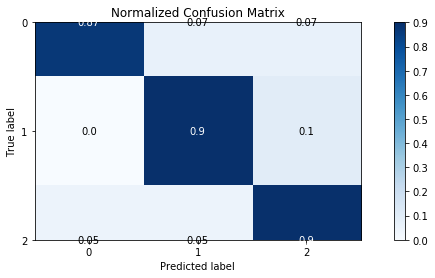

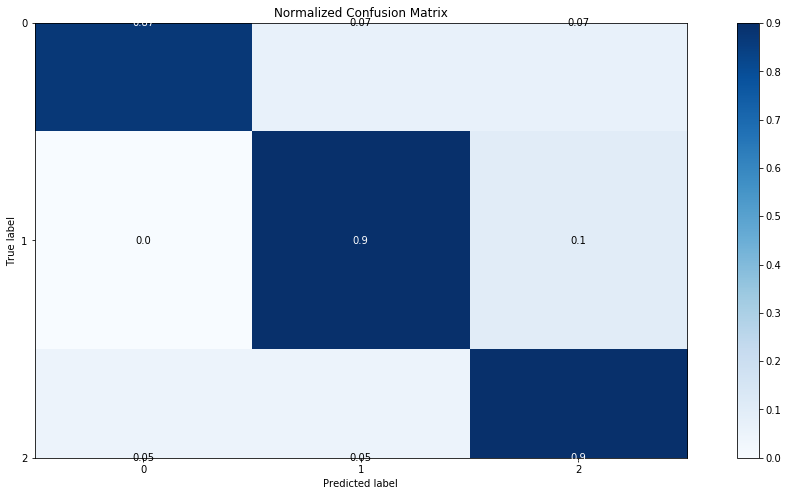

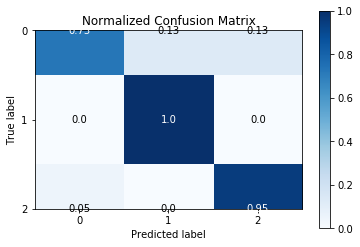

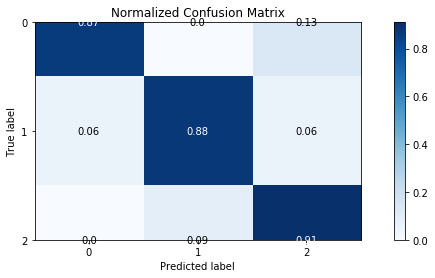

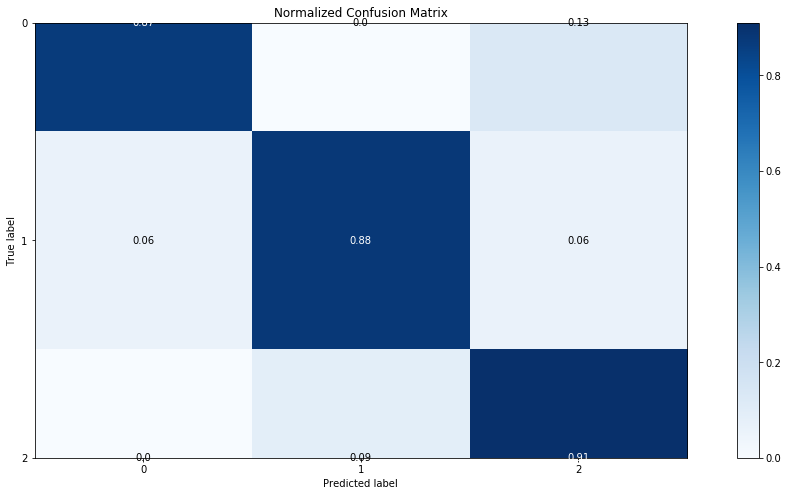

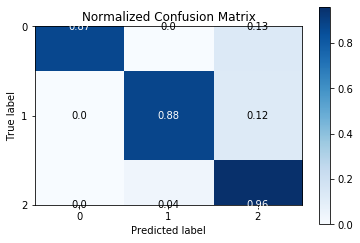

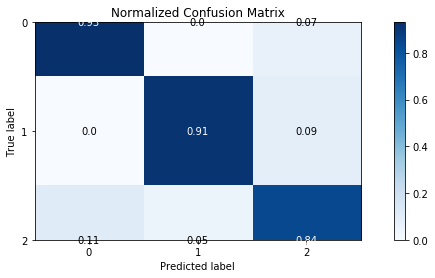

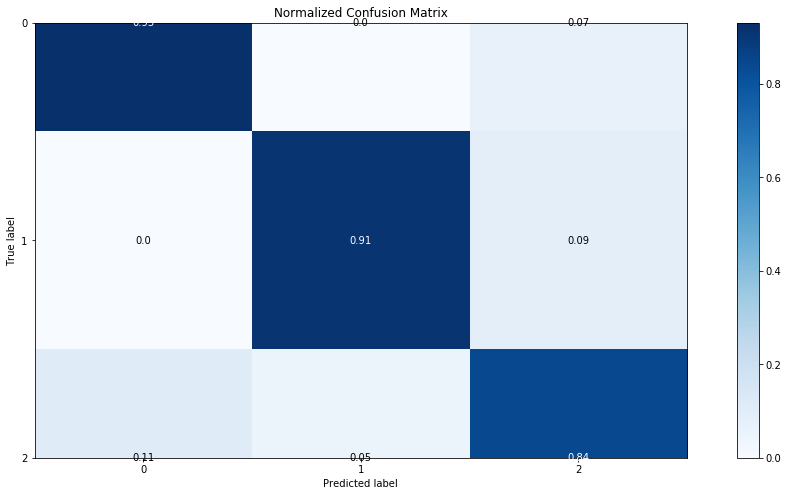

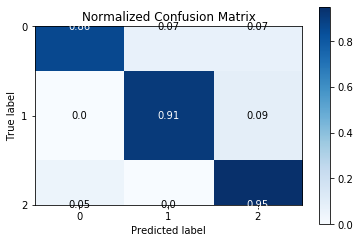

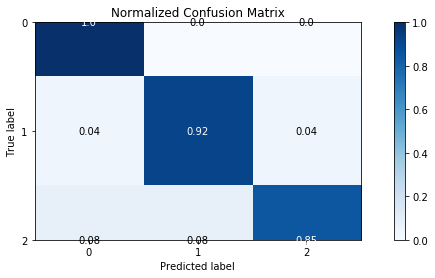

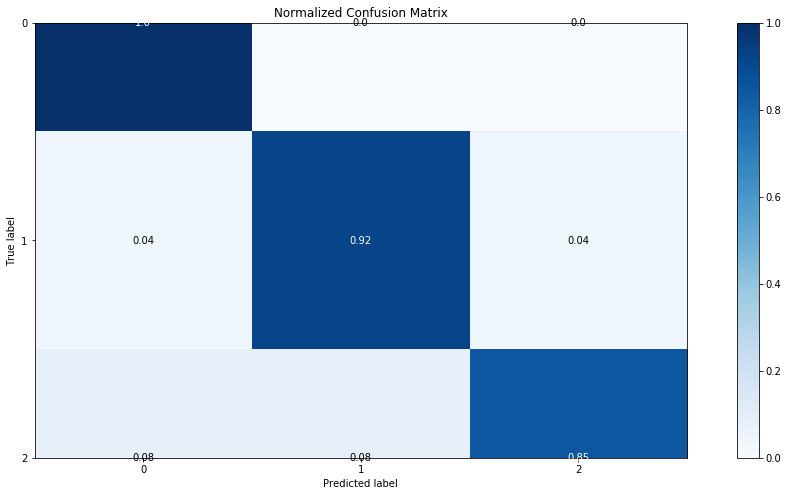

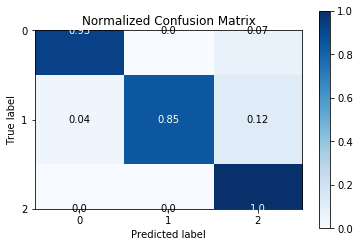

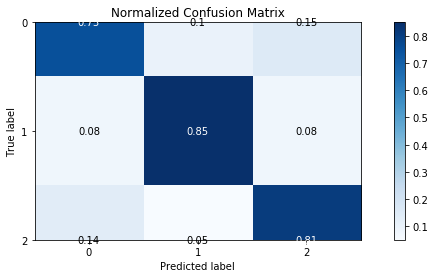

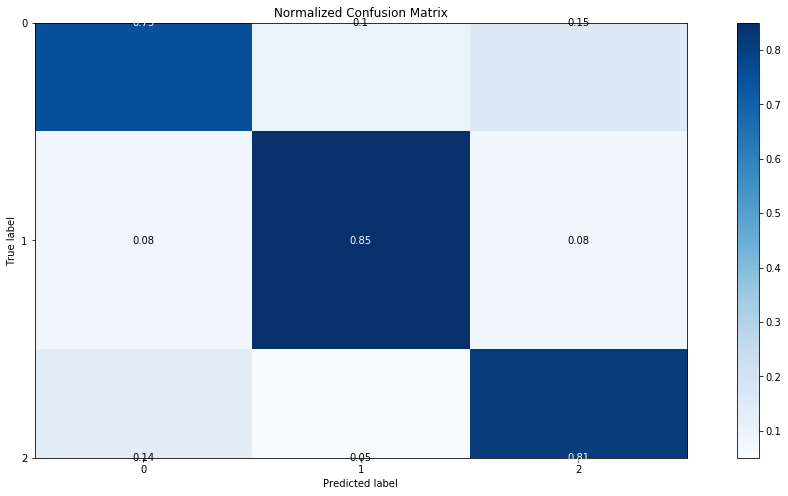

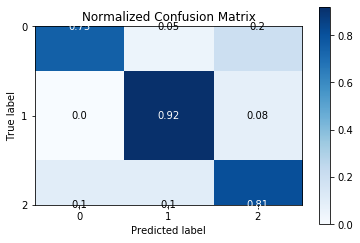

In [148]:
%matplotlib inline
fold_no = 1
plt.close('all')
print("Total Fold No.: {}\n\n" .format(total_fold))
for train_index, test_index in ten_fold.split(X):
#     print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("No. of Training Dataset in Fold ", fold_no, ": ", len(X_train))
    print("No. of Testing Dataset in Fold ", fold_no, ": ", len(X_test))
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    #PV_DBOW using DT with Entropy
    model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
    model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dbow.alpha -= 0.002
        model_dbow.min_alpha = model_dbow.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dbow, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dbow, test_tagged)
        
    nb_gaussian_pv_dbow = GaussianNB()
    nb_gaussian_pv_dbow.fit(X_trained, y_trained)
    y_pred = nb_gaussian_pv_dbow.predict(X_tested)
    
    print("FOR PV_DBOW Using Gaussian Naive Bayes: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(12,4), normalize=True)
    temp = "GaussianNB Confusion Matrix of "+str(fold_no)+".png"
    plt.savefig(temp)
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
#     print("Precision ROC Curve:\n")
# #     skplt.metrics.plot_precision_recall_curve(y_test, y_pred)
#     skplt.metrics.plot_roc(y_test, y_pred)
#     plt.show()
    print("\n\n")
    
    
    
    #PV_DM
    model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
    model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dmm.alpha -= 0.002
        model_dmm.min_alpha = model_dmm.alpha
    
    y_trained, X_trained = vec_for_learning(model_dmm, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dmm, test_tagged)
    
    nb_gaussian_pv_dm = GaussianNB()
    nb_gaussian_pv_dm.fit(X_trained, y_trained)
    y_pred_pv_dm = nb_gaussian_pv_dm.predict(X_tested)
    
    print("FOR PV_DM Using Gaussian Naive Bayes: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(18,8), normalize=True)
    temp = "GaussianNB Confusion Matrix of "+str(fold_no)+".png"
    plt.savefig(temp)
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
#     print("Precision Recall Curve:\n")
#     skplt.metrics.plot_precision_recall_curve(y_test, y_pred)
#     plt.show()
    print("\n\n")
    
    
    #FOR PAIRED_MODEL
    model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    
    new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])
    
    y_train, X_train = vec_for_learning(new_model, train_tagged)
    y_test, X_test = vec_for_learning(new_model, test_tagged)
    
    nb_gaussian_mixed = GaussianNB()
    nb_gaussian_mixed.fit(X_trained, y_trained)
    y_pred = nb_gaussian_mixed.predict(X_tested)
    
    print("FOR PAIRED Model Using Gaussian Naive Bayes: ")
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
    temp = "GaussianNB Confusion Matrix of "+str(fold_no)+".png"
    plt.savefig(temp)
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
#     print("Precision Recall Curve:\n")
#     skplt.metrics.plot_precision_recall_curve(y_test, y_pred)
#     temp = "GaussianNB Precision Recall Curve of "+str(fold_no)+".png"
#     plt.savefig(temp)
    print("\n\n")
    fold_no+=1

100%|██████████| 218/218 [00:00<00:00, 1020489.14it/s]

Total Fold No.: 5


No. of Training Dataset in Fold  1 :  218
No. of Testing Dataset in Fold  1 :  55



100%|██████████| 218/218 [00:00<00:00, 733246.41it/s]


FOR PV_DBOW Using Decision Tree with Gini: 
Fold No.:  1
Testing accuracy 0.8727272727272727
Testing F1 score: 0.8686868686868687

Testing Confusion Matrix: 
[[10  3  2]
 [ 0 20  0]
 [ 0  2 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.80      1.00      0.89        20
           2       0.90      0.90      0.90        20

    accuracy                           0.87        55
   macro avg       0.90      0.86      0.86        55
weighted avg       0.89      0.87      0.87        55



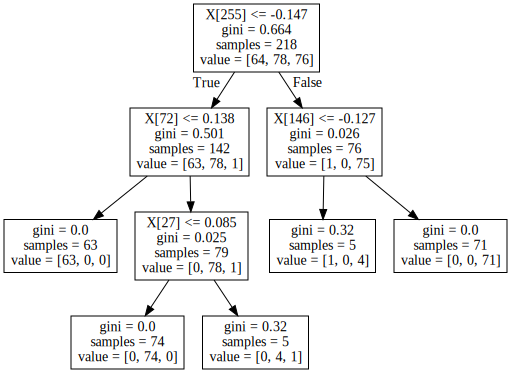

100%|██████████| 218/218 [00:00<00:00, 189582.89it/s]




DBOW best f1:  0.8686868686868687



100%|██████████| 218/218 [00:00<00:00, 977923.29it/s]


FOR PV_DM Using Decision Tree with Gini:  
Fold No.:  1
Testing accuracy 0.8363636363636363
Testing F1 score: 0.8342691790967652

Testing Confusion Matrix: 
[[11  1  3]
 [ 1 19  0]
 [ 2  2 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.86      0.95      0.90        20
           2       0.84      0.80      0.82        20

    accuracy                           0.84        55
   macro avg       0.83      0.83      0.83        55
weighted avg       0.83      0.84      0.83        55



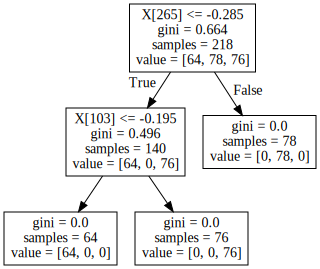




DBOW Best F1:  0.8342691790967652
DM best f1:  0.8342691790967652
FOR Paired Model Using Decision Tree with Gini: 
Testing accuracy 0.8363636363636363
Testing F1 score: 0.8342691790967652

Testing Confusion Matrix: 
[[11  1  3]
 [ 1 19  0]
 [ 2  2 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.86      0.95      0.90        20
           2       0.84      0.80      0.82        20

    accuracy                           0.84        55
   macro avg       0.83      0.83      0.83        55
weighted avg       0.83      0.84      0.83        55



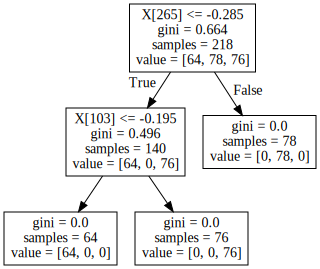




DBOW best f1:  0.8342691790967652
No. of Training Dataset in Fold  2 :  218
No. of Testing Dataset in Fold  2 :  55


100%|██████████| 218/218 [00:00<00:00, 983180.94it/s]


FOR PV_DBOW Using Decision Tree with Gini: 
Fold No.:  2
Testing accuracy 0.8545454545454545
Testing F1 score: 0.8512966254901739

Testing Confusion Matrix: 
[[13  0  2]
 [ 0 17  0]
 [ 3  3 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.85      1.00      0.92        17
           2       0.89      0.74      0.81        23

    accuracy                           0.85        55
   macro avg       0.85      0.87      0.86        55
weighted avg       0.86      0.85      0.85        55



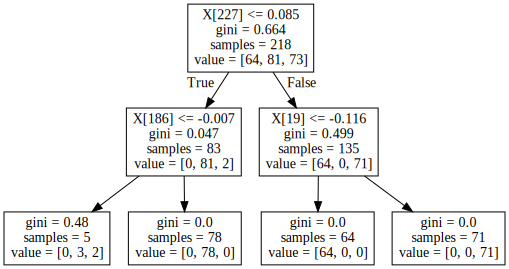

100%|██████████| 218/218 [00:00<00:00, 1153036.91it/s]


100%|██████████| 218/218 [00:00<00:00, 820788.39it/s]


FOR PV_DM Using Decision Tree with Gini:  
Fold No.:  2
Testing accuracy 0.8727272727272727
Testing F1 score: 0.8736999336999337

Testing Confusion Matrix: 
[[13  0  2]
 [ 0 16  1]
 [ 0  4 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.80      0.94      0.86        17
           2       0.86      0.83      0.84        23

    accuracy                           0.87        55
   macro avg       0.89      0.88      0.88        55
weighted avg       0.88      0.87      0.87        55



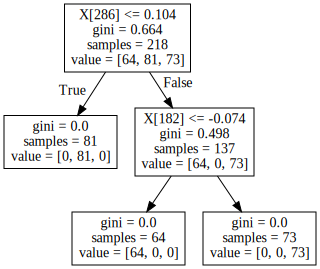




DBOW Best F1:  0.8736999336999337
DM best f1:  0.8736999336999337
FOR Paired Model Using Decision Tree with Gini: 
Testing accuracy 0.8727272727272727
Testing F1 score: 0.8736999336999337

Testing Confusion Matrix: 
[[13  0  2]
 [ 0 16  1]
 [ 0  4 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.80      0.94      0.86        17
           2       0.86      0.83      0.84        23

    accuracy                           0.87        55
   macro avg       0.89      0.88      0.88        55
weighted avg       0.88      0.87      0.87        55



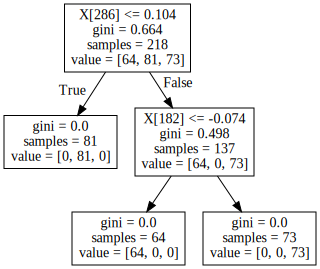




DBOW best f1:  0.8736999336999337
No. of Training Dataset in Fold  3 :  218
No. of Testing Dataset in Fold  3 :  55


100%|██████████| 218/218 [00:00<00:00, 1073190.46it/s]


FOR PV_DBOW Using Decision Tree with Gini: 
Fold No.:  3
Testing accuracy 0.9272727272727272
Testing F1 score: 0.9252660383095167

Testing Confusion Matrix: 
[[11  2  1]
 [ 0 22  0]
 [ 1  0 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.92      1.00      0.96        22
           2       0.95      0.95      0.95        19

    accuracy                           0.93        55
   macro avg       0.93      0.91      0.92        55
weighted avg       0.93      0.93      0.93        55



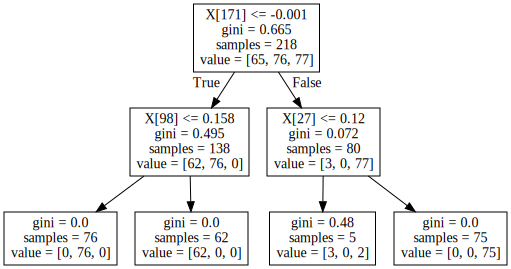

100%|██████████| 218/218 [00:00<00:00, 620745.60it/s]




DBOW best f1:  0.9252660383095167



100%|██████████| 218/218 [00:00<00:00, 1325156.92it/s]


FOR PV_DM Using Decision Tree with Gini:  
Fold No.:  3
Testing accuracy 0.8909090909090909
Testing F1 score: 0.8895344535524445

Testing Confusion Matrix: 
[[13  0  1]
 [ 1 21  0]
 [ 1  3 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.88      0.95      0.91        22
           2       0.94      0.79      0.86        19

    accuracy                           0.89        55
   macro avg       0.89      0.89      0.89        55
weighted avg       0.89      0.89      0.89        55



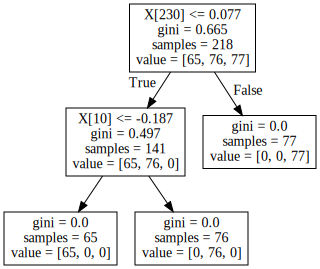




DBOW Best F1:  0.8895344535524445
DM best f1:  0.8895344535524445
FOR Paired Model Using Decision Tree with Gini: 
Testing accuracy 0.8909090909090909
Testing F1 score: 0.8895344535524445

Testing Confusion Matrix: 
[[13  0  1]
 [ 1 21  0]
 [ 1  3 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.88      0.95      0.91        22
           2       0.94      0.79      0.86        19

    accuracy                           0.89        55
   macro avg       0.89      0.89      0.89        55
weighted avg       0.89      0.89      0.89        55



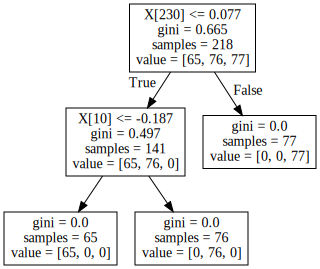




DBOW best f1:  0.8895344535524445
No. of Training Dataset in Fold  4 :  219
No. of Testing Dataset in Fold  4 :  54


100%|██████████| 219/219 [00:00<00:00, 676401.01it/s]


FOR PV_DBOW Using Decision Tree with Gini: 
Fold No.:  4
Testing accuracy 0.9074074074074074
Testing F1 score: 0.9085714285714285

Testing Confusion Matrix: 
[[14  0  1]
 [ 1 23  2]
 [ 0  1 12]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.96      0.88      0.92        26
           2       0.80      0.92      0.86        13

    accuracy                           0.91        54
   macro avg       0.90      0.91      0.90        54
weighted avg       0.91      0.91      0.91        54



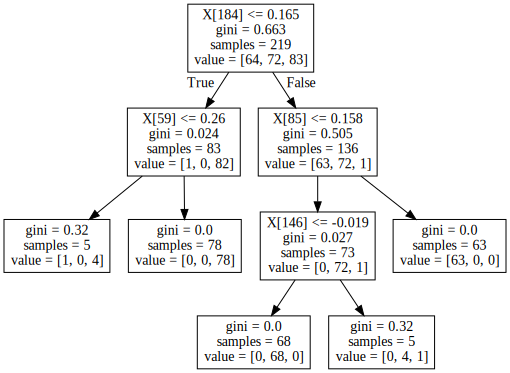

100%|██████████| 219/219 [00:00<00:00, 610333.94it/s]


100%|██████████| 219/219 [00:00<00:00, 864927.10it/s]


FOR PV_DM Using Decision Tree with Gini:  
Fold No.:  4
Testing accuracy 0.9259259259259259
Testing F1 score: 0.9259259259259259

Testing Confusion Matrix: 
[[14  1  0]
 [ 1 24  1]
 [ 0  1 12]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.92      0.92      0.92        26
           2       0.92      0.92      0.92        13

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54



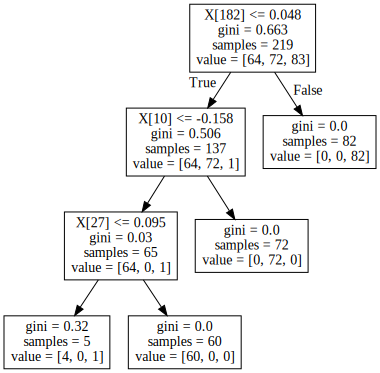




DBOW Best F1:  0.9259259259259259
DM best f1:  0.9259259259259259
FOR Paired Model Using Decision Tree with Gini: 
Testing accuracy 0.9259259259259259
Testing F1 score: 0.9259259259259259

Testing Confusion Matrix: 
[[14  1  0]
 [ 1 24  1]
 [ 0  1 12]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.92      0.92      0.92        26
           2       0.92      0.92      0.92        13

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54



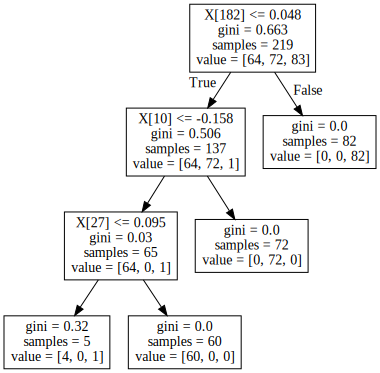




DBOW best f1:  0.9259259259259259
No. of Training Dataset in Fold  5 :  219
No. of Testing Dataset in Fold  5 :  54


100%|██████████| 219/219 [00:00<00:00, 1310346.04it/s]


FOR PV_DBOW Using Decision Tree with Gini: 
Fold No.:  5
Testing accuracy 0.7592592592592593
Testing F1 score: 0.7603465253871758

Testing Confusion Matrix: 
[[14  3  3]
 [ 1 11  1]
 [ 2  3 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.70      0.76        20
           1       0.65      0.85      0.73        13
           2       0.80      0.76      0.78        21

    accuracy                           0.76        54
   macro avg       0.76      0.77      0.76        54
weighted avg       0.77      0.76      0.76        54



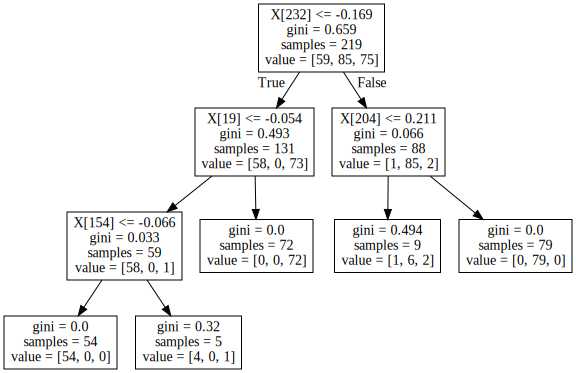

100%|██████████| 219/219 [00:00<00:00, 1065606.24it/s]


100%|██████████| 219/219 [00:00<00:00, 909458.00it/s]


FOR PV_DM Using Decision Tree with Gini:  
Fold No.:  5
Testing accuracy 0.7962962962962963
Testing F1 score: 0.7953660978051224

Testing Confusion Matrix: 
[[14  3  3]
 [ 1 12  0]
 [ 2  2 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.70      0.76        20
           1       0.71      0.92      0.80        13
           2       0.85      0.81      0.83        21

    accuracy                           0.80        54
   macro avg       0.79      0.81      0.80        54
weighted avg       0.81      0.80      0.80        54



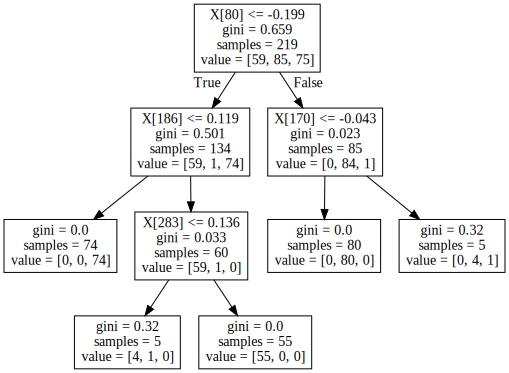




DBOW Best F1:  0.7953660978051224
FOR Paired Model Using Decision Tree with Gini: 
Testing accuracy 0.7962962962962963
Testing F1 score: 0.7953660978051224

Testing Confusion Matrix: 
[[14  3  3]
 [ 1 12  0]
 [ 2  2 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.70      0.76        20
           1       0.71      0.92      0.80        13
           2       0.85      0.81      0.83        21

    accuracy                           0.80        54
   macro avg       0.79      0.81      0.80        54
weighted avg       0.81      0.80      0.80        54



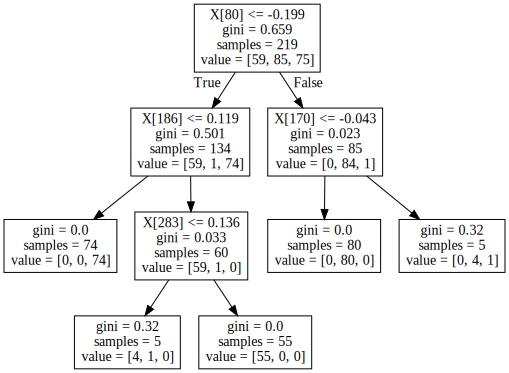

In [174]:
dt_dbow_entropy_best = None
dt_dbow_entropy_f1 = 0

dt_dm_entropy_best = None
dt_dm_entropy_f1 = 0

dt_paired_entropy_best = None
dt_paired_entropy_f1 = 0

model_dbow_best = None
model_dmm_best = None
new_model_best = None

fold_no = 1
print("Total Fold No.: {}\n\n" .format(total_fold))
for train_index, test_index in ten_fold.split(X):
#     print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("No. of Training Dataset in Fold ", fold_no, ": ", len(X_train))
    print("No. of Testing Dataset in Fold ", fold_no, ": ", len(X_test))
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    #PV_DBOW using DT with Entropy
    model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
    model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dbow.alpha -= 0.002
        model_dbow.min_alpha = model_dbow.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dbow, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dbow, test_tagged)
    
    dt_dbow_entropy = DecisionTreeClassifier(criterion = "gini", 
                                             random_state = 10, 
                                             max_depth = 3, 
                                             min_samples_leaf = 5)
    dt_dbow_entropy.fit(X_trained, y_trained)
    y_pred = dt_dbow_entropy.predict(X_tested)
    
    print("FOR PV_DBOW Using Decision Tree with Gini: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    f1 = f1_score(y_test, y_pred, average='weighted')
    print('Testing F1 score: {}'.format(f1))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    
#     dot_data = StringIO()
#     export_graphviz(dt_dbow_entropy, out_file=dot_data, filled=True, rounded=True, special_characters=True)
#     graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#     Image(graph.create_png())
#     display(graph)
    display(graphviz.Source(export_graphviz(dt_dbow_entropy)))
    print("\n\n")
    
#     print("DBOW best f1: ", f1)
    if f1 > dt_dbow_entropy_f1:
        dt_dbow_entropy_f1 = f1
        dt_dbow_entropy_best = dt_dbow_entropy
        model_dbow_best = model_dbow
        print("DBOW best f1: ", dt_dbow_entropy_f1)
    
    
#     break
    #PV_DM
    model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
    model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dmm.alpha -= 0.002
        model_dmm.min_alpha = model_dmm.alpha
    
    y_trained, X_trained = vec_for_learning(model_dmm, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dmm, test_tagged)
    
    dt_dm_entropy = DecisionTreeClassifier(criterion = "gini", 
                                             random_state = 10, 
                                             max_depth = 3, 
                                             min_samples_leaf = 5)
    dt_dm_entropy.fit(X_trained, y_trained)
    y_pred = dt_dm_entropy.predict(X_tested)
    
    print("FOR PV_DM Using Decision Tree with Gini:  ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    f1 = f1_score(y_test, y_pred, average='weighted')
    print('Testing F1 score: {}'.format(f1))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    display(graphviz.Source(export_graphviz(dt_dm_entropy)))
    print("\n\n")
    
    print("DBOW Best F1: ", f1)
    if f1 > dt_dm_entropy_f1:
        dt_dm_entropy_f1 = f1
        dt_dm_entropy_best = dt_dm_entropy
        model_dm_best = model_dmm
        print("DM best f1: ", dt_dm_entropy_f1)
    
    #FOR PAIRED_MODEL
    model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    
    new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])
    
    y_train, X_train = vec_for_learning(new_model, train_tagged)
    y_test, X_test = vec_for_learning(new_model, test_tagged)
    
    dt_paired_entropy = DecisionTreeClassifier(criterion = "gini", 
                                             random_state = 10, 
                                             max_depth = 3, 
                                             min_samples_leaf = 5)
    dt_paired_entropy.fit(X_trained, y_trained)
    y_pred = dt_paired_entropy.predict(X_tested)
    
    print("FOR Paired Model Using Decision Tree with Gini: ")
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    f1 = f1_score(y_test, y_pred, average='weighted')
    print('Testing F1 score: {}'.format(f1))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    display(graphviz.Source(export_graphviz(dt_paired_entropy)))
    print("\n\n")
    
    if f1 > dt_paired_entropy_f1:
        dt_paired_entropy_f1 = f1
        dt_paired_entropy_best = dt_paired_entropy
        new_model_best = new_model
        print("DBOW best f1: ", dt_paired_entropy_f1)
        
    fold_no+=1

In [175]:
print("DBOW: ", dt_dbow_entropy_f1)

print("DM: ", dt_dm_entropy_f1)

print("Paired: ", dt_paired_entropy_f1)

DBOW:  0.9252660383095167
DM:  0.9259259259259259
Paired:  0.9259259259259259


In [171]:
model_dbow_best.most_similar('stress')

[('jobs', 0.21564558148384094),
 ('scream', 0.1793798804283142),
 ('file', 0.1791234165430069),
 ('aged', 0.1758168637752533),
 ('silent', 0.175094872713089),
 ('well', 0.15477843582630157),
 ('particular', 0.1537594497203827),
 ('objects', 0.15245170891284943),
 ('smoked', 0.13639713823795319),
 ('today', 0.1321779489517212)]

In [152]:
print("Data 1\n", df.story[0])
print("Label: ", df.category[0], "\n")
print("Data 2\n", df.story[9])
print("Label: ", df.category[9], "\n")
print("Data 3\n", df.story[1])
print("Label: ", df.category[1], "\n")
print("Data 4\n", df.story[3])
print("Label: ", df.category[1], "\n")
print("Data 5\n", df.story[11])
print("Label: ", df.category[11], "\n")
print("Data 6\n", df.story[11])
print("Label: ", df.category[11], "\n")

Data 1
 my trainer facetimed me multiple times i ignored his calls because i thought it was strange and that if it was important he 'd leave a voicemail or tet email me but he kept calling ( at least five times ) finally i answered he was naked and masturbating with the camera pointed directly on him i hung up immediately he then proceeded to facebook message me begging me to answer the phone saying that it was a form of flattering to have him want to masturbate to my voice face gym results i avoided the gym for a while after that for a few months i even avoided walking on the same street as the gym to avoid any contact with the trainer i finally got the courage to walk in and ask to speak to the manager and the owner once the manager heard my story ( a woman ) she had me talk to the owner sadly the owner basically said to get over it because it happens in all gyms 
Label:  2 

Data 2
 i 've been bullied since pre k i always wore pants never dresses so everyone thought i was a boy i co

In [153]:
### Similarity Work Stress

In [154]:
v1 = model_dm_best.infer_vector(df.story[0].split())
v2 = model_dm_best.infer_vector(df.story[9].split())

similarity = spatial.distance.cosine(v1, v2)
similarity

0.3659922480583191

In [155]:
### Similarity Bullying

In [156]:
v1 = model_dm_best.infer_vector(df.story[1].split())
v2 = model_dm_best.infer_vector(df.story[3].split())

similarity = spatial.distance.cosine(v1, v2)
similarity

0.36840856075286865

In [157]:
### Similarity Sexual Harassment

In [158]:
v1 = model_dm_best.infer_vector(df.story[11].split())
v2 = model_dm_best.infer_vector(df.story[15].split())

similarity = spatial.distance.cosine(v1, v2)
similarity

0.4065665006637573

In [159]:
### Dissimilarity Work Stress VS Bullying

In [160]:
v1 = model_dm_best.infer_vector(df.story[0].split())
v2 = model_dm_best.infer_vector(df.story[3].split())

similarity = spatial.distance.cosine(v1, v2)
similarity

0.4830346703529358

In [161]:
### Dissimilarity Work Stress Vs Sexual Harassment

In [162]:
v1 = model_dm_best.infer_vector(df.story[0].split())
v2 = model_dm_best.infer_vector(df.story[11].split())

similarity = spatial.distance.cosine(v1, v2)
similarity

0.054447710514068604

In [163]:
### Dissimilarity Bullying Vs Sexual Harassment

In [165]:
v1 = model_dm_best.infer_vector(df.story[3].split())
v2 = model_dm_best.infer_vector(df.story[11].split())

similarity = spatial.distance.cosine(v1, v2)
similarity

0.4623430371284485

In [94]:
v1 = model_dm_best.infer_vector(f3.split())
v2 = model_dm_best.infer_vector(f4.split())

similarity = spatial.distance.cosine(v1, v2)
similarity

0.08758378028869629

In [95]:
v1 = model_dm_best.infer_vector(f3.split())
v2 = model_dm_best.infer_vector(f5.split())

similarity = spatial.distance.cosine(v1, v2)
similarity

0.5217909514904022

In [96]:
v1 = new_model_best.infer_vector(f3.split())
v2 = new_model_best.infer_vector(f2.split())

similarity = spatial.distance.cosine(v1, v2)
similarity

0.015185415744781494

In [ ]:
### actual test

In [176]:
y_test, X_test = vec_for_learning(model_dbow_best, extra_tagged)

In [177]:
extra_pred = dt_dbow_entropy_best.predict(X_test)
extra_pred

array([0, 2, 1, 1, 1, 0, 0, 0, 1])

In [178]:
extra_category

[0, 2, 2, 1, 2, 0, 0, 1, 1]

In [195]:
extra_category[3]

1

In [199]:
for i in range(0,8):
    if extra_category[i] != extra_pred[i]:
        print("Story: \n", extra_test.story[i], "\n\nActual Label: ", extra_category[i], "\n")
        print("Model Predicted: ", extra_pred[i], "\n")

Story: 
 one day while going to the school i suddenly heard a whistle and saw some boys looking at me and their inappropriate gesture shivered me to the core i also heard them whispering dirty talks behind me they followed me to the school after break while i was returning from school i found those bastards got arrested while they started to tease a girl in front of a police car without noticing that car  

Actual Label:  2 

Model Predicted:  1 

Story: 
 i do 't let those who have abused me have control over me anymore i lost control of my life just about 7 years ago i went through things no little girl should at 13 14 15 16 17 everytime i 'd face one thing another terrible thing would happen i wanted to stop fighting with everything i had but i did 't i kept sleeping on it and pushing through everything now im here engaged have my own home with my fiance and graduated with my associates degree in baking and pastry i no longer fear to leave the house or go to work i have done everyth

In [180]:
print("F1 Score On Test Set: ", f1_score(extra_category, extra_pred, average='weighted'))

F1 Score On Test Set:  0.6428571428571428


In [181]:
print("Confusion Matrix On Test Set\n")
confusion_matrix(extra_category, extra_pred)

Confusion Matrix On Test Set



array([[3, 0, 0],
       [1, 2, 0],
       [0, 2, 1]])

In [101]:
y_test, X_test = vec_for_learning(model_dm_best, extra_tagged)

In [102]:
extra_pred = dt_dm_entropy_best.predict(X_test)
extra_pred

array([0, 2, 2, 1, 0])

In [103]:
y_test, X_test = vec_for_learning(new_model_best, extra_tagged)

### K-Fold Neural Network LSTM

In [202]:
import tensorflow as tf
import keras
from keras.models import *
from keras.layers import *
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.regularizers import l2

class Lstm:
    def lstm_model(self, input_shape, class_num):

        # lstm_input = Input(shape = (40,32))
        lstm_input = Input(shape = input_shape)

        lstm = CuDNNLSTM(32, return_sequences = True, kernel_regularizer=l2(0.01), kernel_initializer = 'random_normal')(lstm_input)
        activate = Activation("relu")(lstm)
        batch_norm = BatchNormalization()(activate)
        lstm = CuDNNLSTM(32, return_sequences = True, kernel_regularizer=l2(0.01), kernel_initializer = 'random_normal')(batch_norm)
        activate = Activation("relu")(lstm)
        batch_norm = BatchNormalization()(activate)
        lstm = CuDNNLSTM(16, return_sequences = True, kernel_regularizer=l2(0.01), kernel_initializer = 'random_normal')(batch_norm)
        activate = Activation("relu")(lstm)
        batch_norm = BatchNormalization()(activate)
        lstm = CuDNNLSTM(16, return_sequences = True, kernel_regularizer=l2(0.01), kernel_initializer = 'random_normal')(batch_norm)
        activate = Activation("relu")(lstm)
        batch_norm = BatchNormalization()(activate)
        lstm = CuDNNLSTM(10, return_sequences = True, kernel_regularizer=l2(0.01), kernel_initializer = 'random_normal')(batch_norm)
        activate = Activation("relu")(lstm)
        batch_norm = BatchNormalization()(activate)
        lstm = CuDNNLSTM(10, kernel_regularizer=l2(0.01), kernel_initializer = 'random_normal')(batch_norm)
        activate = Activation("relu")(lstm)
        batch_norm = BatchNormalization()(activate)
        dense = Dense(100, activation = 'relu', kernel_regularizer=l2(0.01))(batch_norm)
        dense = Dropout(.2)(dense)
        batch_norm = BatchNormalization()(dense)
        dense = Dense(100, activation = 'relu', kernel_regularizer=l2(0.01))(batch_norm)
        dense = Dropout(.2)(dense)
        batch_norm = BatchNormalization()(lstm)
        dense = Dense(100, activation = 'relu', kernel_regularizer=l2(0.01))(batch_norm)
        dense = Dropout(.2)(dense)
        dense = Dense(class_num, activation = 'softmax')(dense)

        model = keras.models.Model(lstm_input , dense)

        return model

In [204]:
print(keras.__version__)

2.3.0
